## <center> <font color="blue"> CISC 5352 Financial Programming & Application Final Project</font>
## <center> <font color="purple"> Hao Sun, Yichao Li, Le Zhang, Ao Li</font> 
## <center> <font color="purple"> 12/12/2018</font> 

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
data=pd.read_csv('endowment_2018.csv')
data.head()

University   GPA  Loan rate  Enrollment   Endowment  \
0           Harvard University  4.00   0.463391        6710  35495355.0   
1  University of Texas--Austin  3.75   0.806930       40168  29041575.0   
2              Yale University  3.87   0.477273        5472  25490350.0   
3         Princeton University  3.90   0.267241        5400  22438026.5   
4          Stanford University  3.90   0.462722        7034  22310543.5   

   Graduation rate   SAT  Accept ratio  Tuition  Public/Private  Money_used  
0             0.86  1497          0.05    48949               0           1  
1             0.55  1297          0.40    10136               1           0  
2             0.86  1498          0.06    51400               0           1  
3             0.89  1490          0.07    47140               0           1  
4             0.75  1479          0.05    49617               0           1

# Part A. Visualizations

## 1. If private school students have lower loan rates than public school students?

In [36]:
data=data.sort_values(['Loan rate'],ascending=[0])
data.head()

University   GPA  Loan rate  Enrollment  Endowment  \
127      University of South Carolina  3.85   0.987315       25556   640327.5   
155   Worcester Polytechnic Institute  3.80   0.986745        4432   451093.5   
125  Rensselaer Polytechnic Institute  3.90   0.979524        6265   655731.0   
231           Salve Regina University  3.30   0.976767        2124    55478.5   
216         Roger Williams University  3.30   0.976269        4902    82768.5   

     Graduation rate   SAT  Accept ratio  Tuition  Public/Private  Money_used  
127             0.54  1275          0.68    12262               1           1  
155             0.80  1380          0.48    48628               0           1  
125             0.61  1368          0.44    52305               0           1  
231             0.64  1180          0.68    38986               0           1  
216             0.55  1200          0.79    33336               0           0

Text(0,0.5,'Loan Rate')

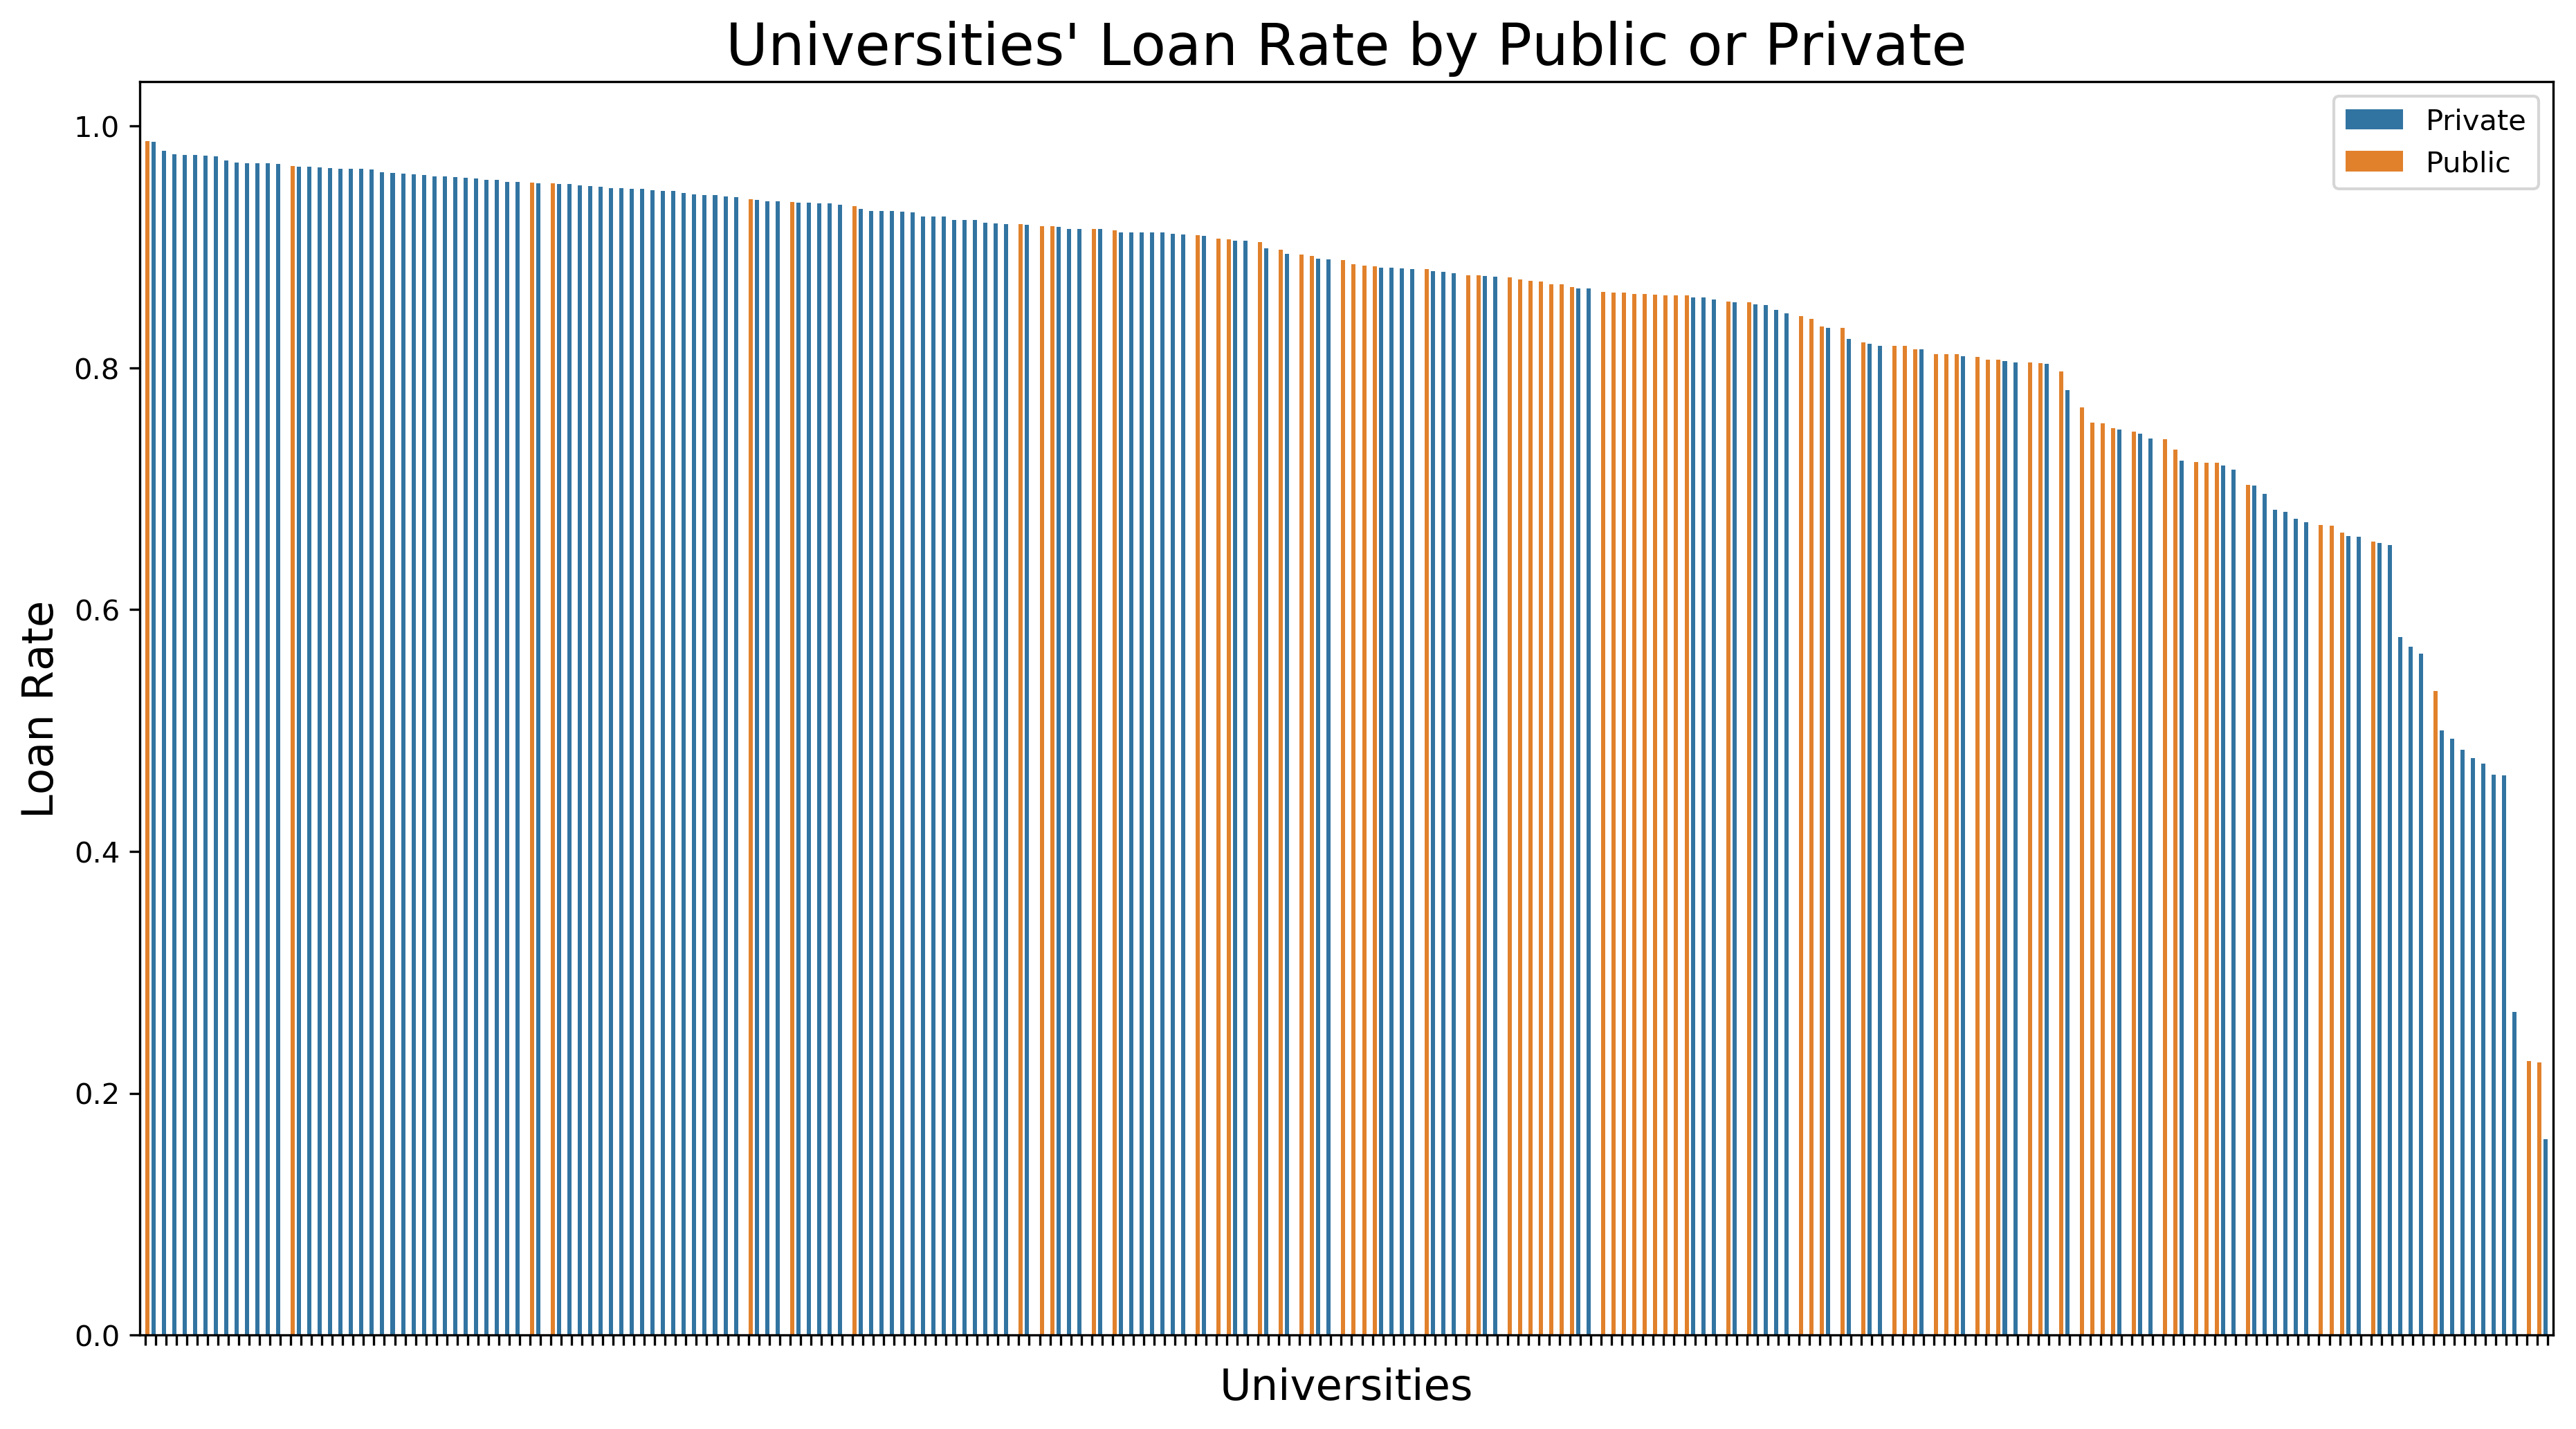

In [37]:
fig, ax = plt.subplots(1, 1, figsize = (15, 8), dpi=300)
sns.barplot(data['University'],data['Loan rate'],hue=data['Public/Private'])
ax.set(xticklabels=[])
ax.axes.set_title("Universities' Loan Rate by Public or Private",fontsize=20)
L=ax.legend()
L.get_texts()[0].set_text('Private')
L.get_texts()[1].set_text('Public')
ax.set_xlabel("Universities",fontsize=15)
ax.set_ylabel("Loan Rate",fontsize=15)

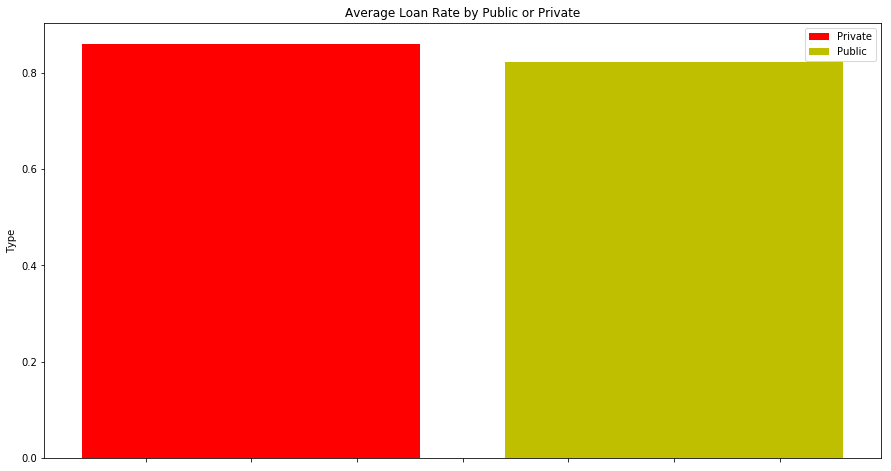

In [38]:
fig, ax = plt.subplots(figsize=(15,8))
rect1=plt.bar(data['Public/Private'][data['Public/Private']==0],data['Loan rate'][data['Public/Private']==0].mean(),color='r')
rect2=plt.bar(data['Public/Private'][data['Public/Private']==1],data['Loan rate'][data['Public/Private']==1].mean(),color='y')
ax.set_ylabel('Average Loan Rate')
ax.set_ylabel('Type')
ax.set_title('Average Loan Rate by Public or Private')

ax.set_xticklabels([])

ax.legend((rect1[1], rect2[1]), ('Private', 'Public'))

plt.show()

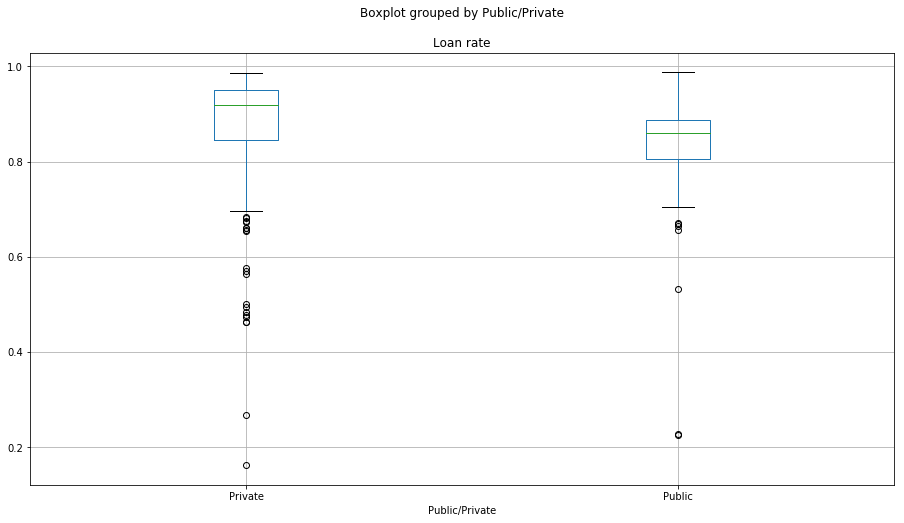

In [39]:
data2=data
data2['Public/Private']=data2['Public/Private'].replace(0,'Private')
data2['Public/Private']=data2['Public/Private'].replace(1,'Public')
data.boxplot('Loan rate',by='Public/Private',figsize=(15,8))

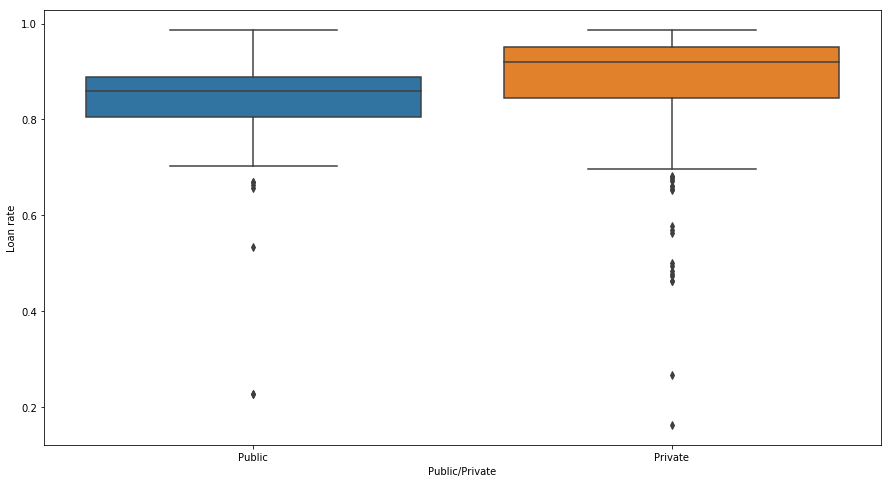

In [40]:
import matplotlib.patches as patches
fig, ax = plt.subplots(figsize=(15,8))
ax=sns.boxplot(x='Public/Private',y='Loan rate',data=data)
rect = patches.Rectangle(
    xy=(ax.get_xlim()[0], 2),  # lower left corner of box: beginning of x-axis range & y coord)
    width=ax.get_xlim()[1]-ax.get_xlim()[0],  # width from x-axis range
    height=1,
    color='green', alpha=0.1, ec='red'
)
ax.add_patch(rect)
plt.show()

## 2. If private schools will get more endowments than public schools

Text(0,0.5,'Endowment')

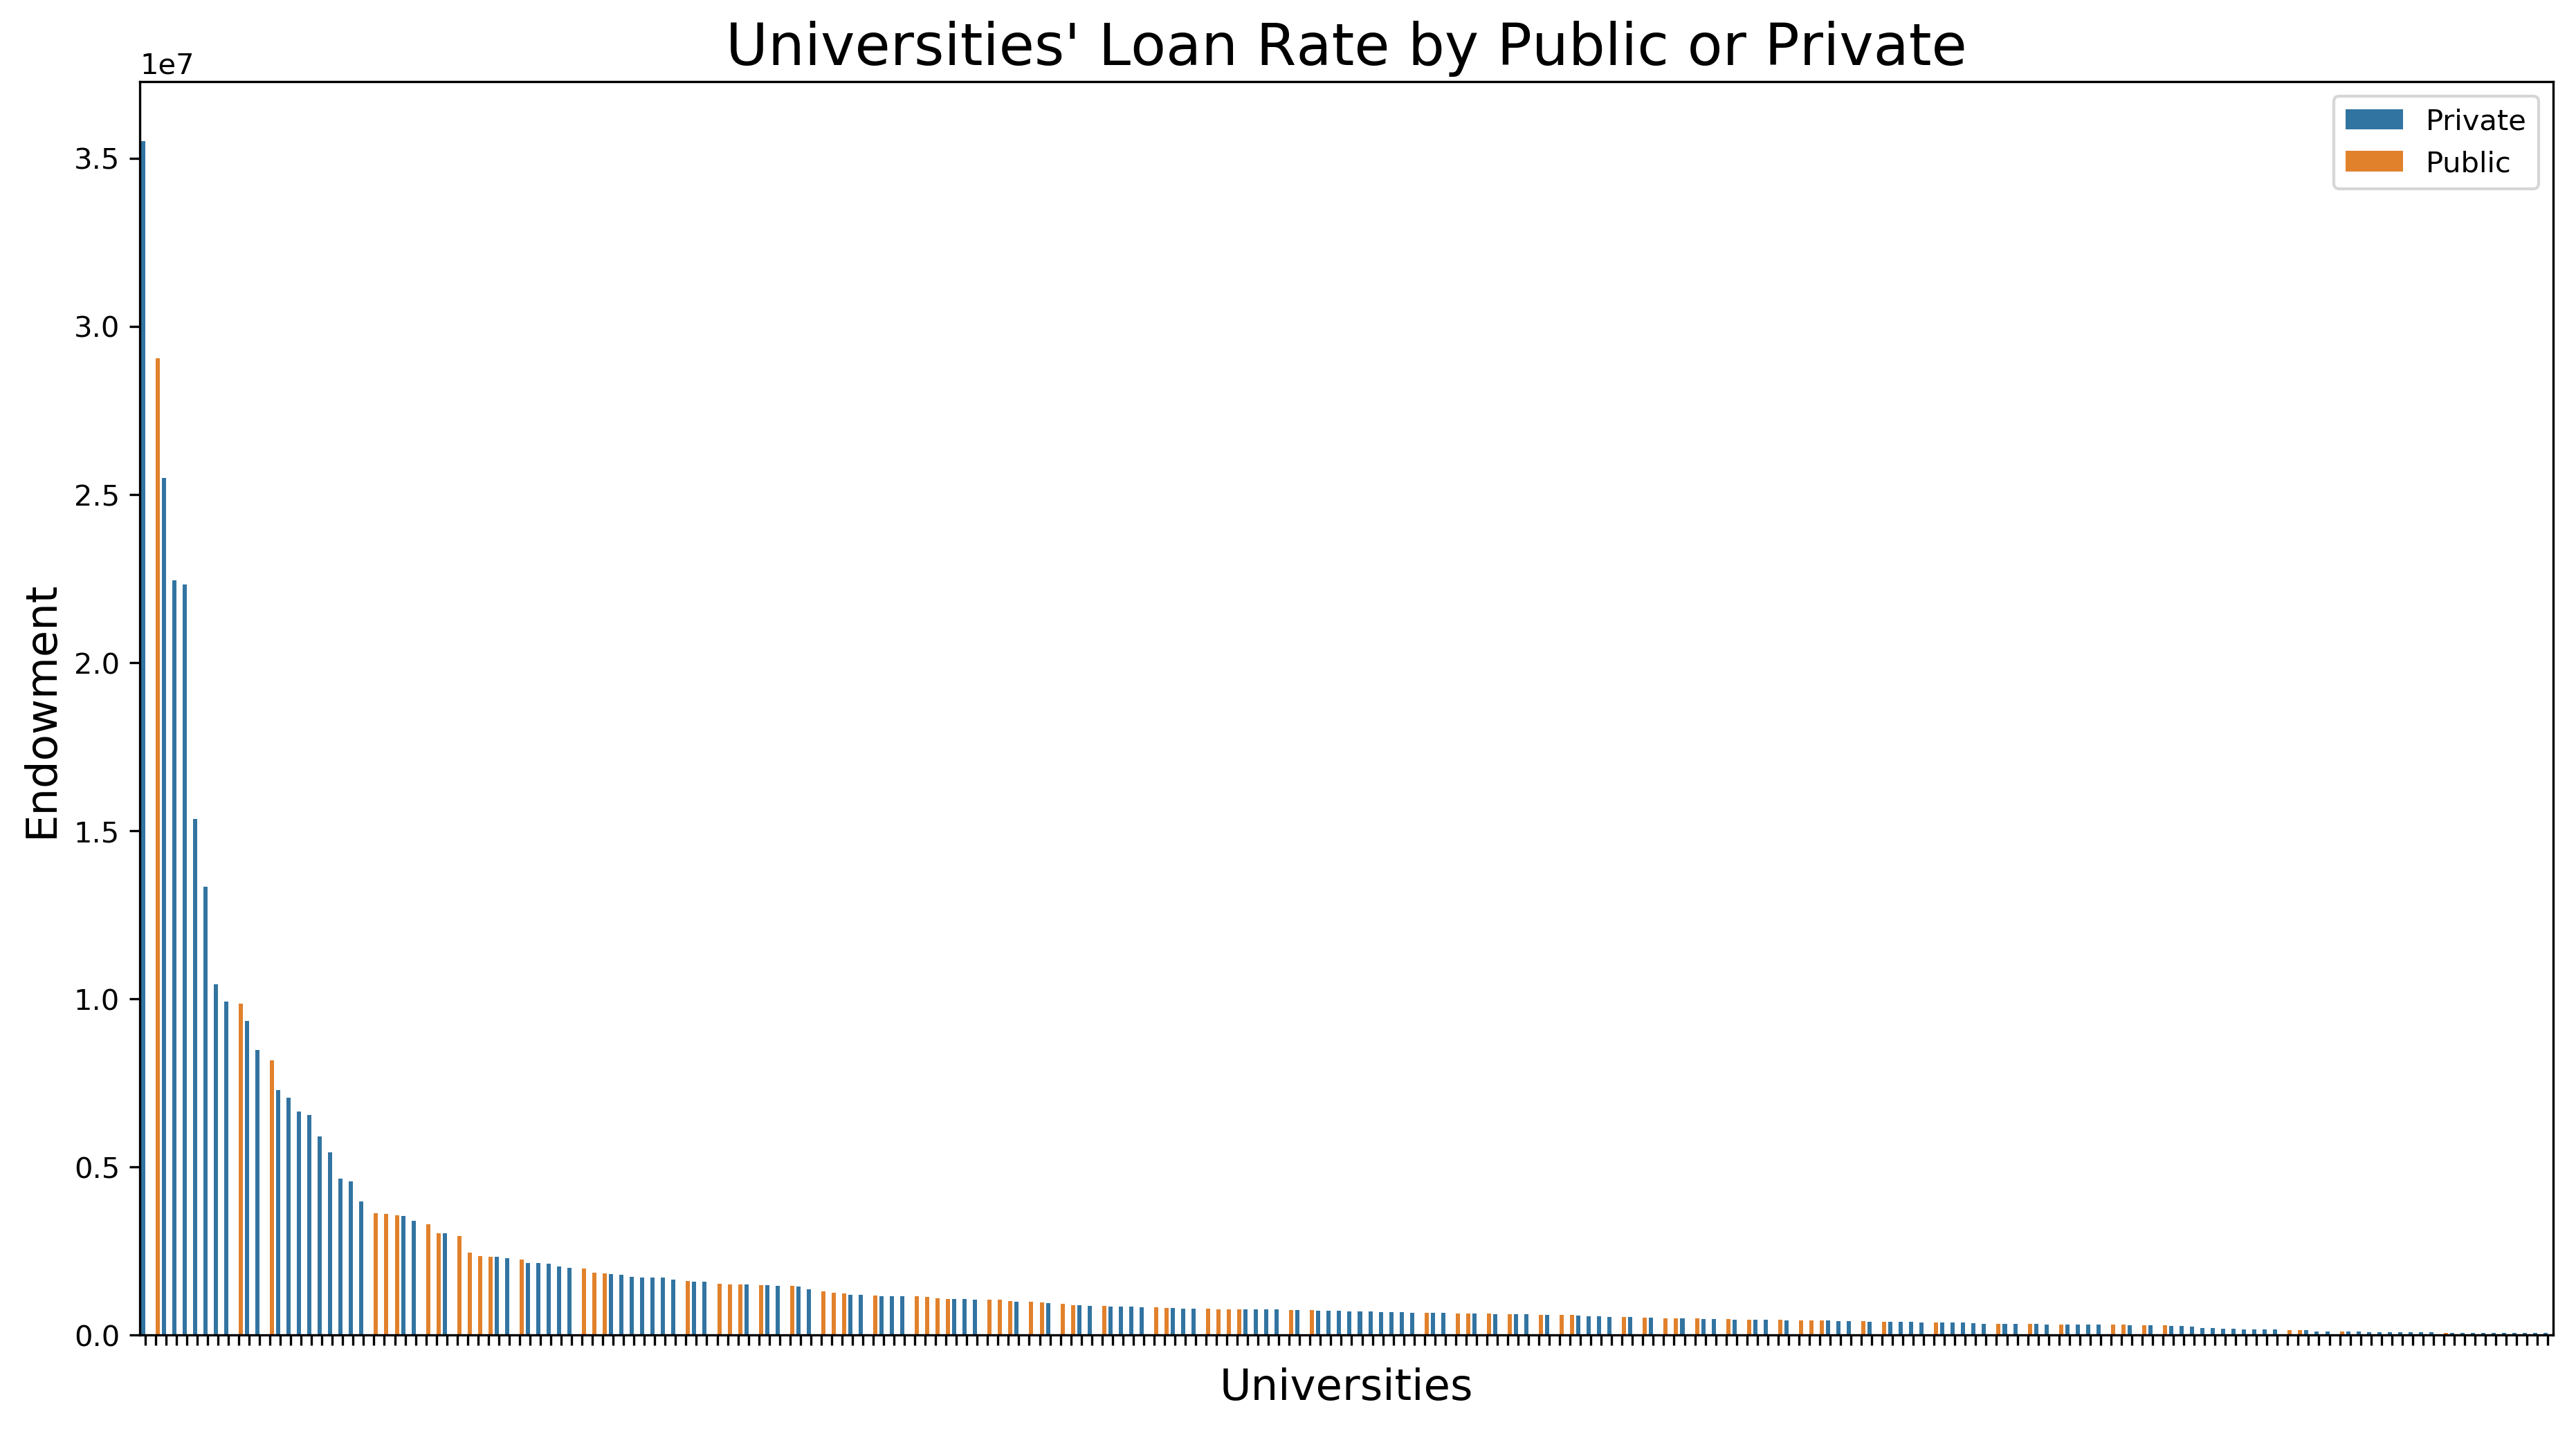

In [43]:
data=data.sort_values(['Endowment'],ascending=[0])
fig, ax = plt.subplots(1, 1, figsize = (15, 8), dpi=300)
sns.barplot(data['University'],data['Endowment'],hue=data['Public/Private'])
ax.set(xticklabels=[])
ax.axes.set_title("Universities' Loan Rate by Public or Private",fontsize=20)
L=ax.legend()
L.get_texts()[0].set_text('Private')
L.get_texts()[1].set_text('Public')
ax.set_xlabel("Universities",fontsize=15)
ax.set_ylabel("Endowment",fontsize=15)

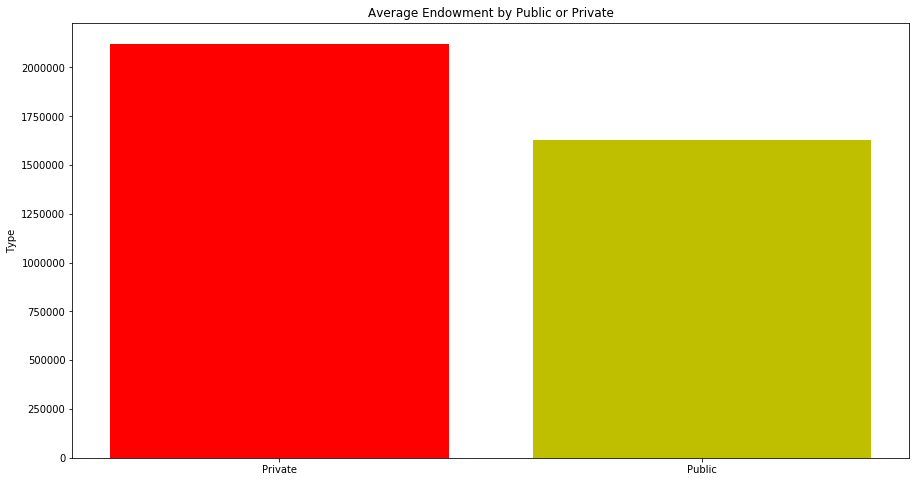

In [44]:
fig, ax = plt.subplots(figsize=(15,8))
plt.bar(data2['Public/Private'][data2['Public/Private']=='Private'],data2['Endowment'][data2['Public/Private']=='Private'].mean(),color='r',label='Private')
plt.bar(data2['Public/Private'][data2['Public/Private']=='Public'],data2['Endowment'][data2['Public/Private']=='Public'].mean(),color='y',label='Public')
plt.ylabel('Average Endowment')
plt.ylabel('Type')
plt.title('Average Endowment by Public or Private')

plt.show()

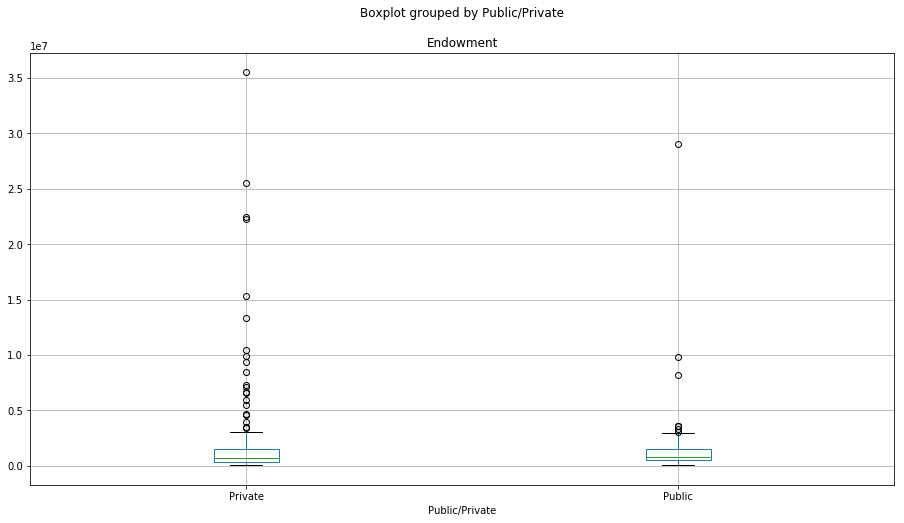

In [45]:
fig, ax = plt.subplots(figsize=(15,8))
data2.boxplot('Endowment',by='Public/Private',figsize=(15,8))

Text(0.5,1,'Average Endowment by Public or Private')

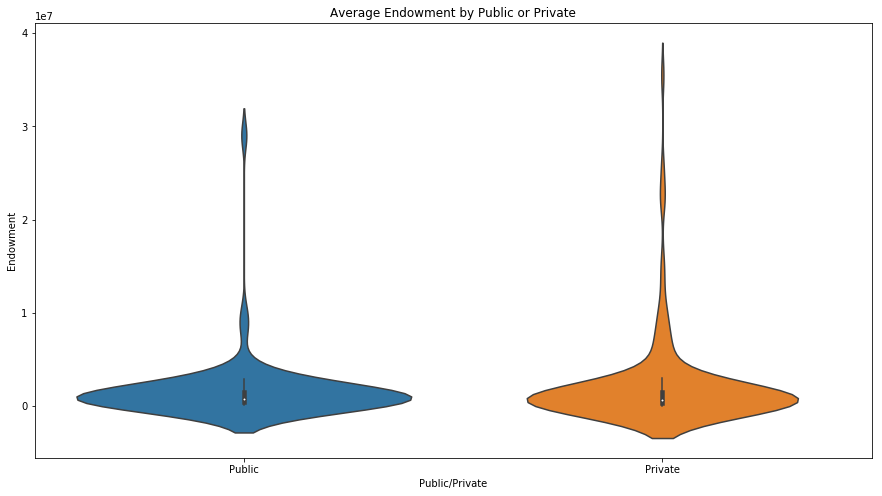

In [47]:
fig, ax = plt.subplots(figsize=(15,8))
ax=sns.violinplot(x='Public/Private',y='Endowment',data=data2)

plt.title('Average Endowment by Public or Private')


## 3. If schools with more enrollments, would it get more endowments? 

Text(0,0.5,'Endowment')

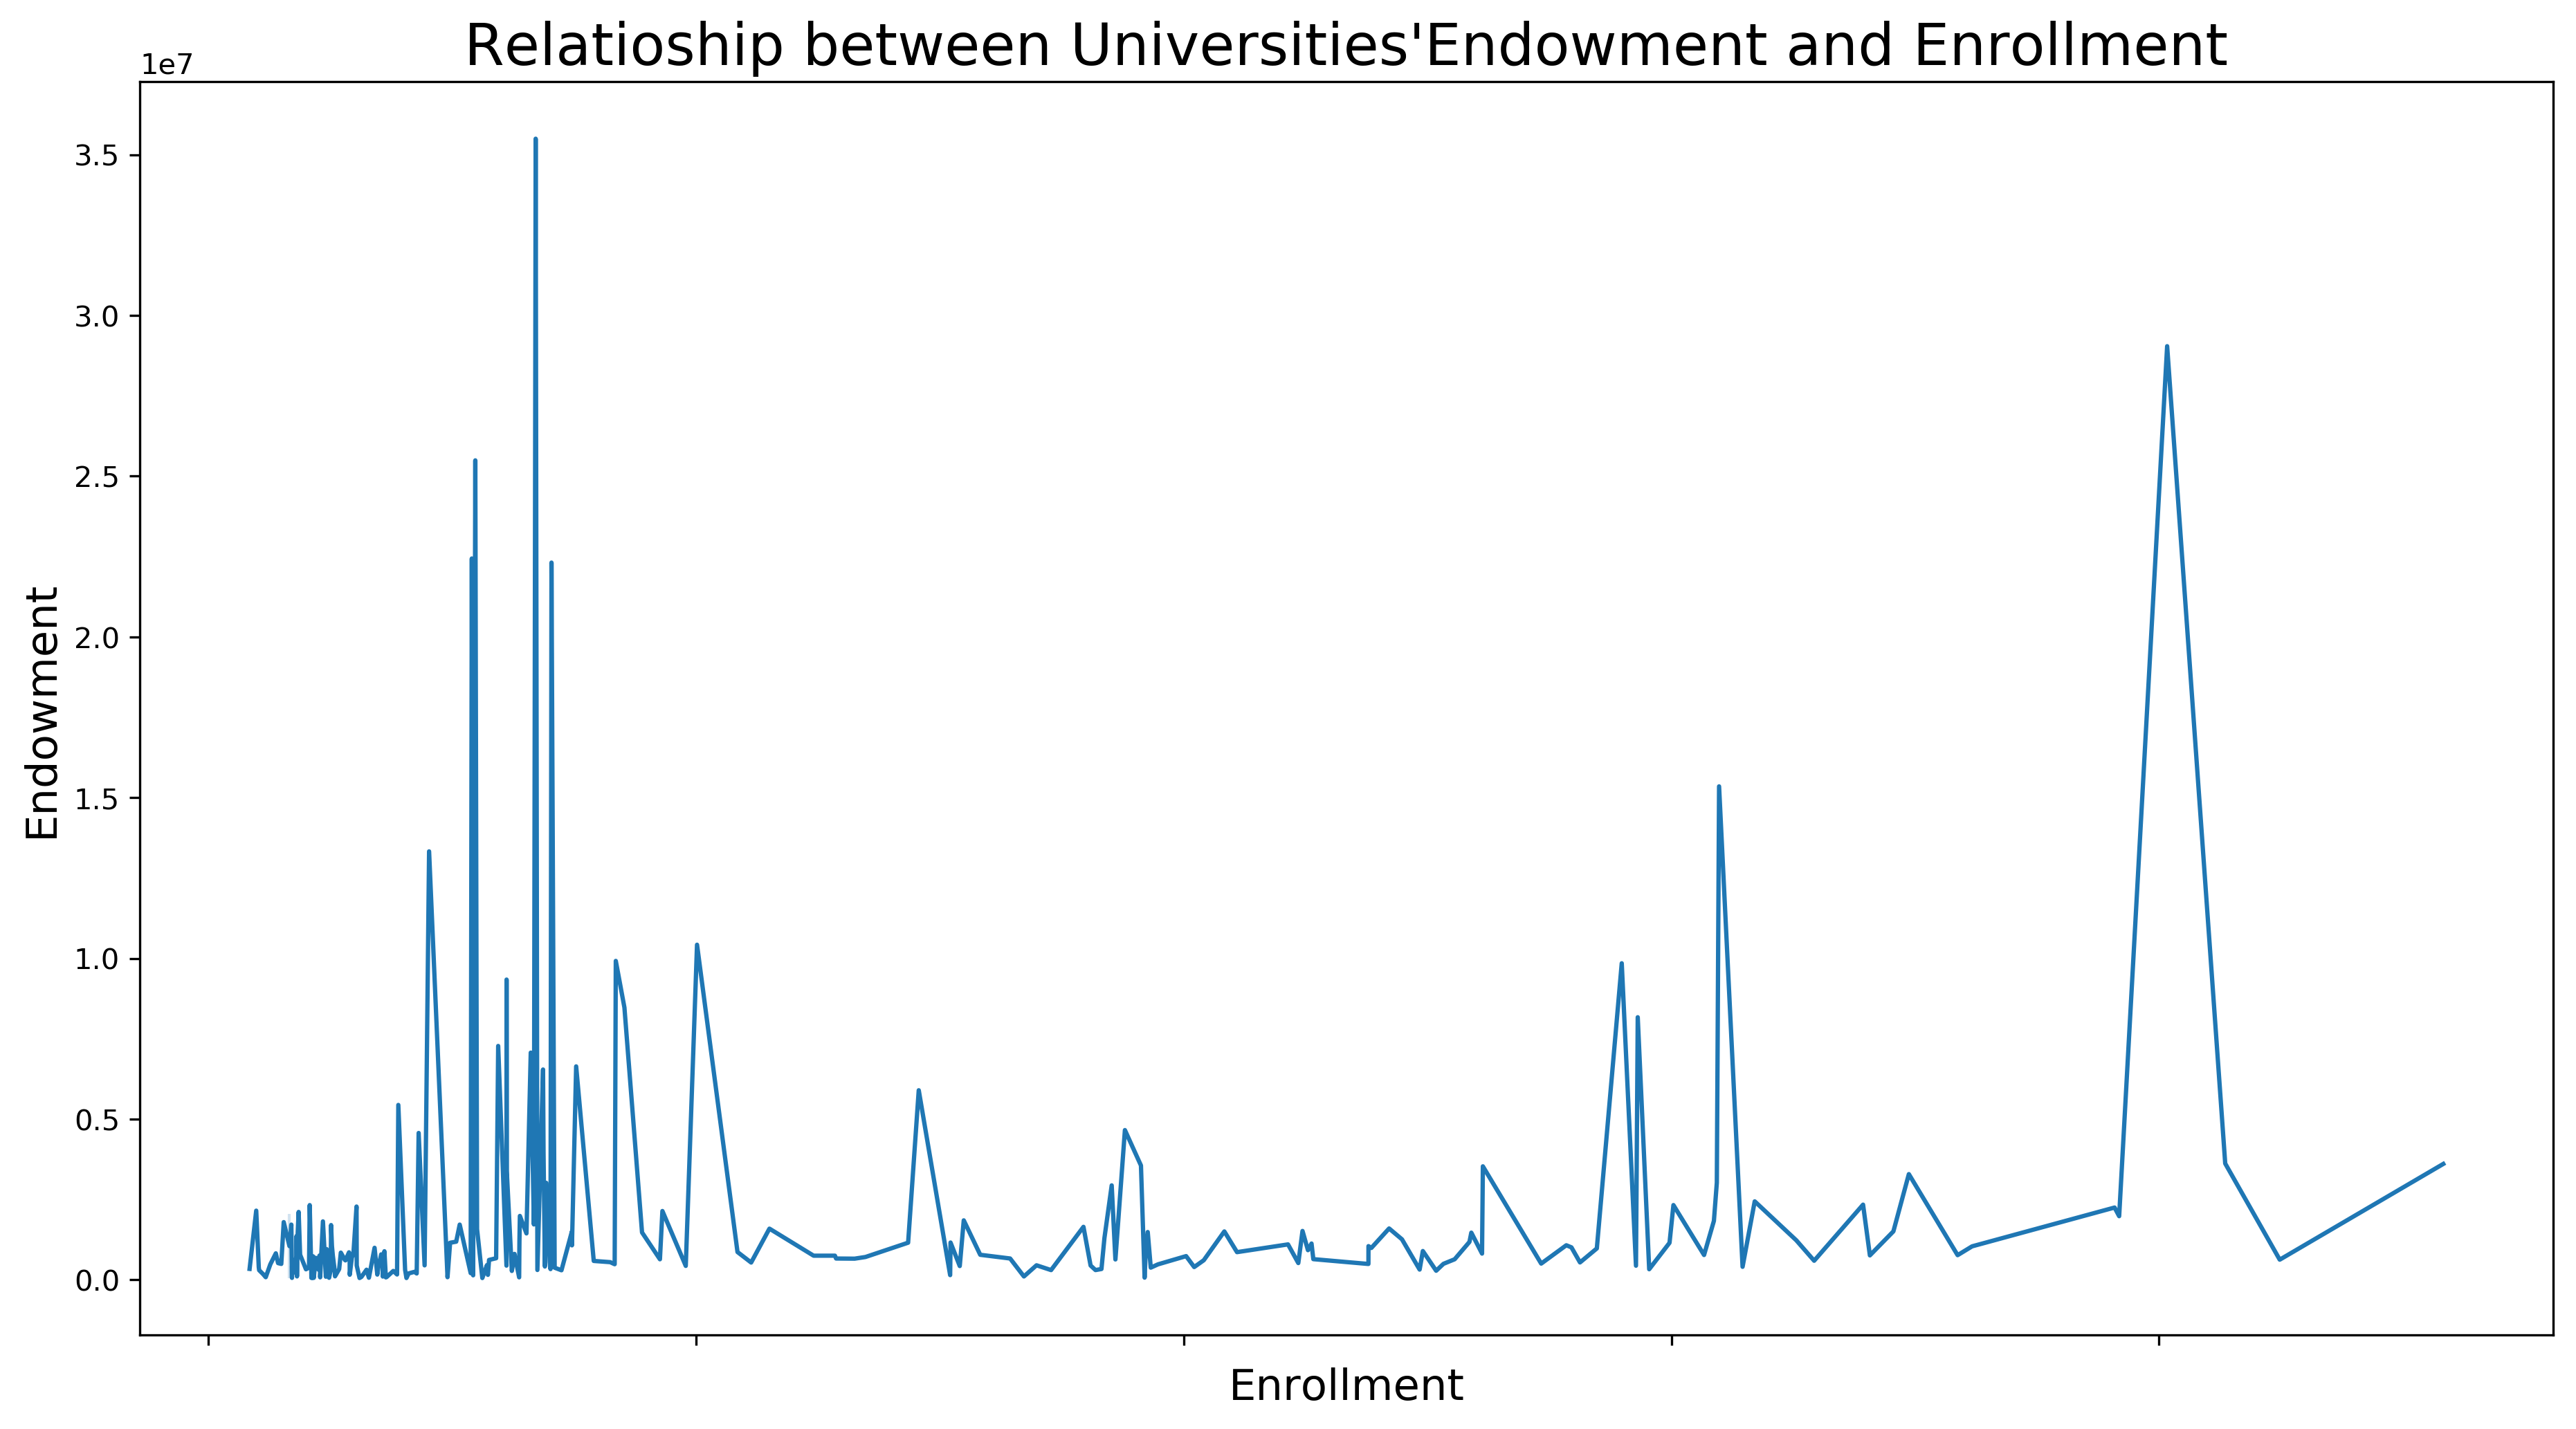

In [49]:
fig, ax = plt.subplots(1, 1, figsize = (15, 8), dpi=300)
sns.lineplot(data['Enrollment'],data['Endowment'])
ax.set(xticklabels=[])
ax.axes.set_title("Relatioship between Universities'Endowment and Enrollment",fontsize=20)
ax.set_xlabel("Enrollment",fontsize=15)
ax.set_ylabel("Endowment",fontsize=15)

Text(0,0.5,'Endowment')

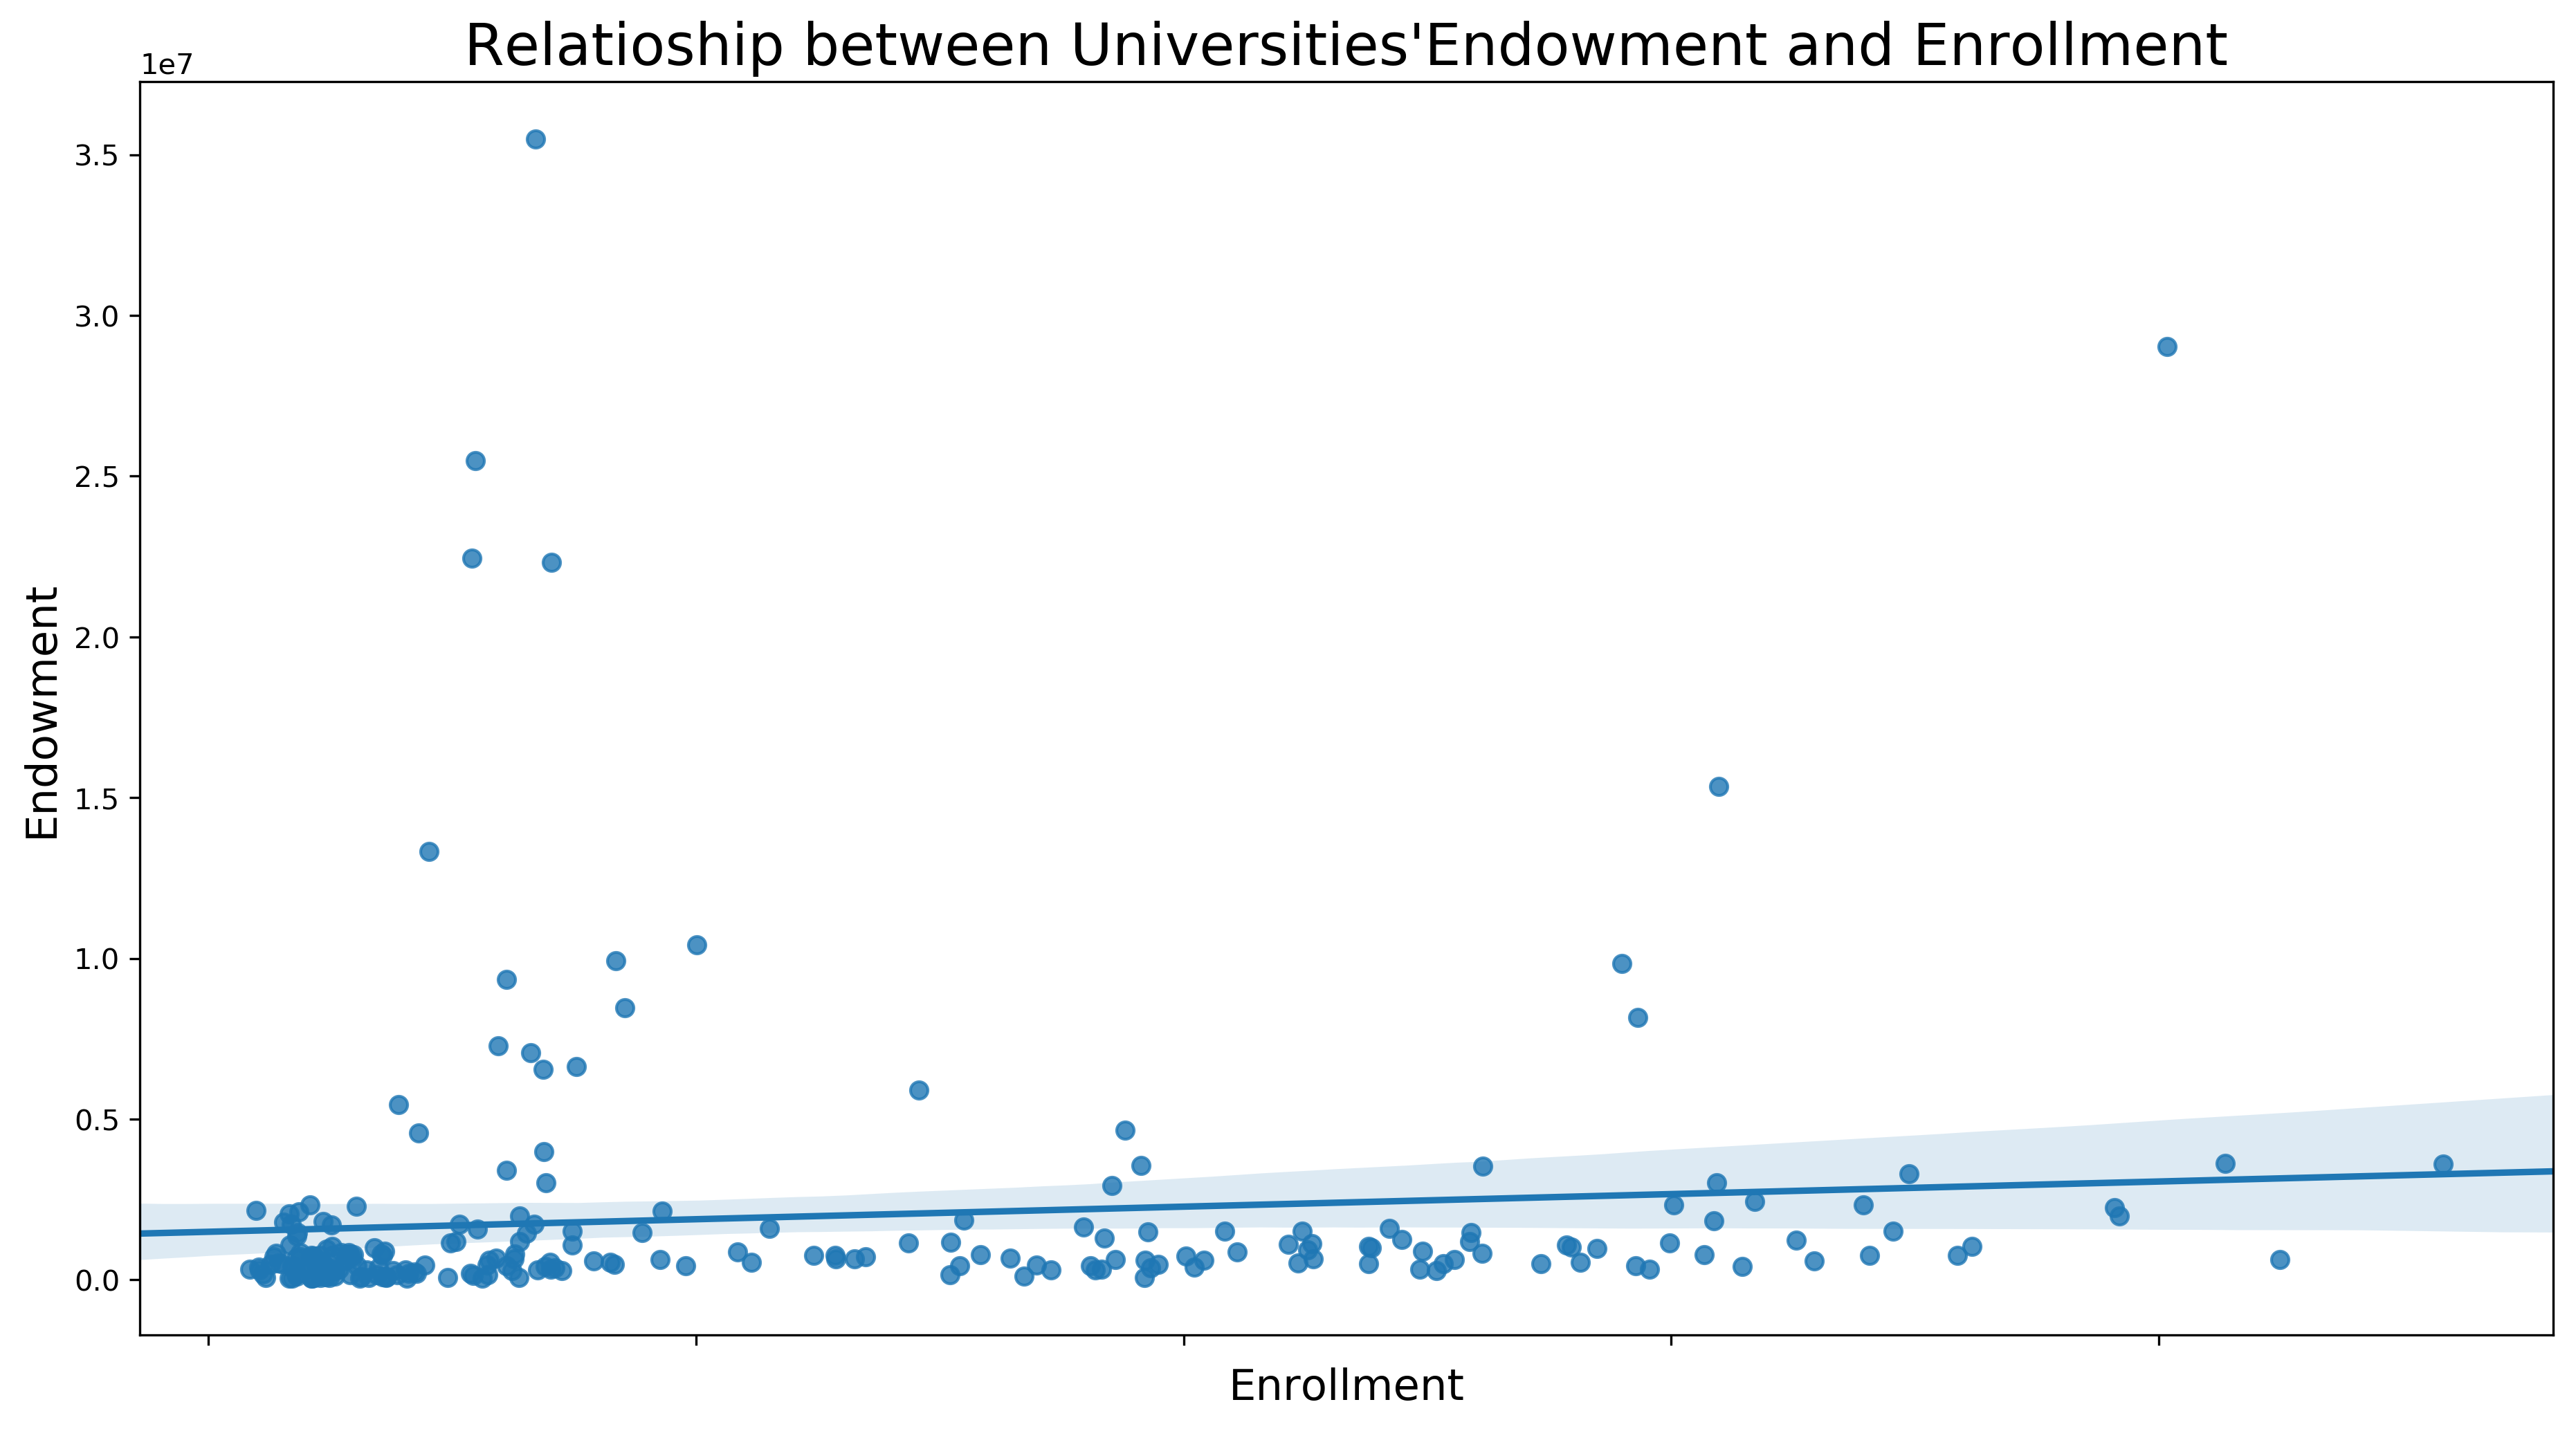

In [50]:
fig, ax = plt.subplots(1, 1, figsize = (15, 8), dpi=300)
sns.regplot(data['Enrollment'],data['Endowment'])
ax.set(xticklabels=[])
ax.axes.set_title("Relatioship between Universities'Endowment and Enrollment",fontsize=20)
ax.set_xlabel("Enrollment",fontsize=15)
ax.set_ylabel("Endowment",fontsize=15)

## 4. If school with low acceptance ratios, it will get more endowments? 

Text(0,0.5,'Endowment')

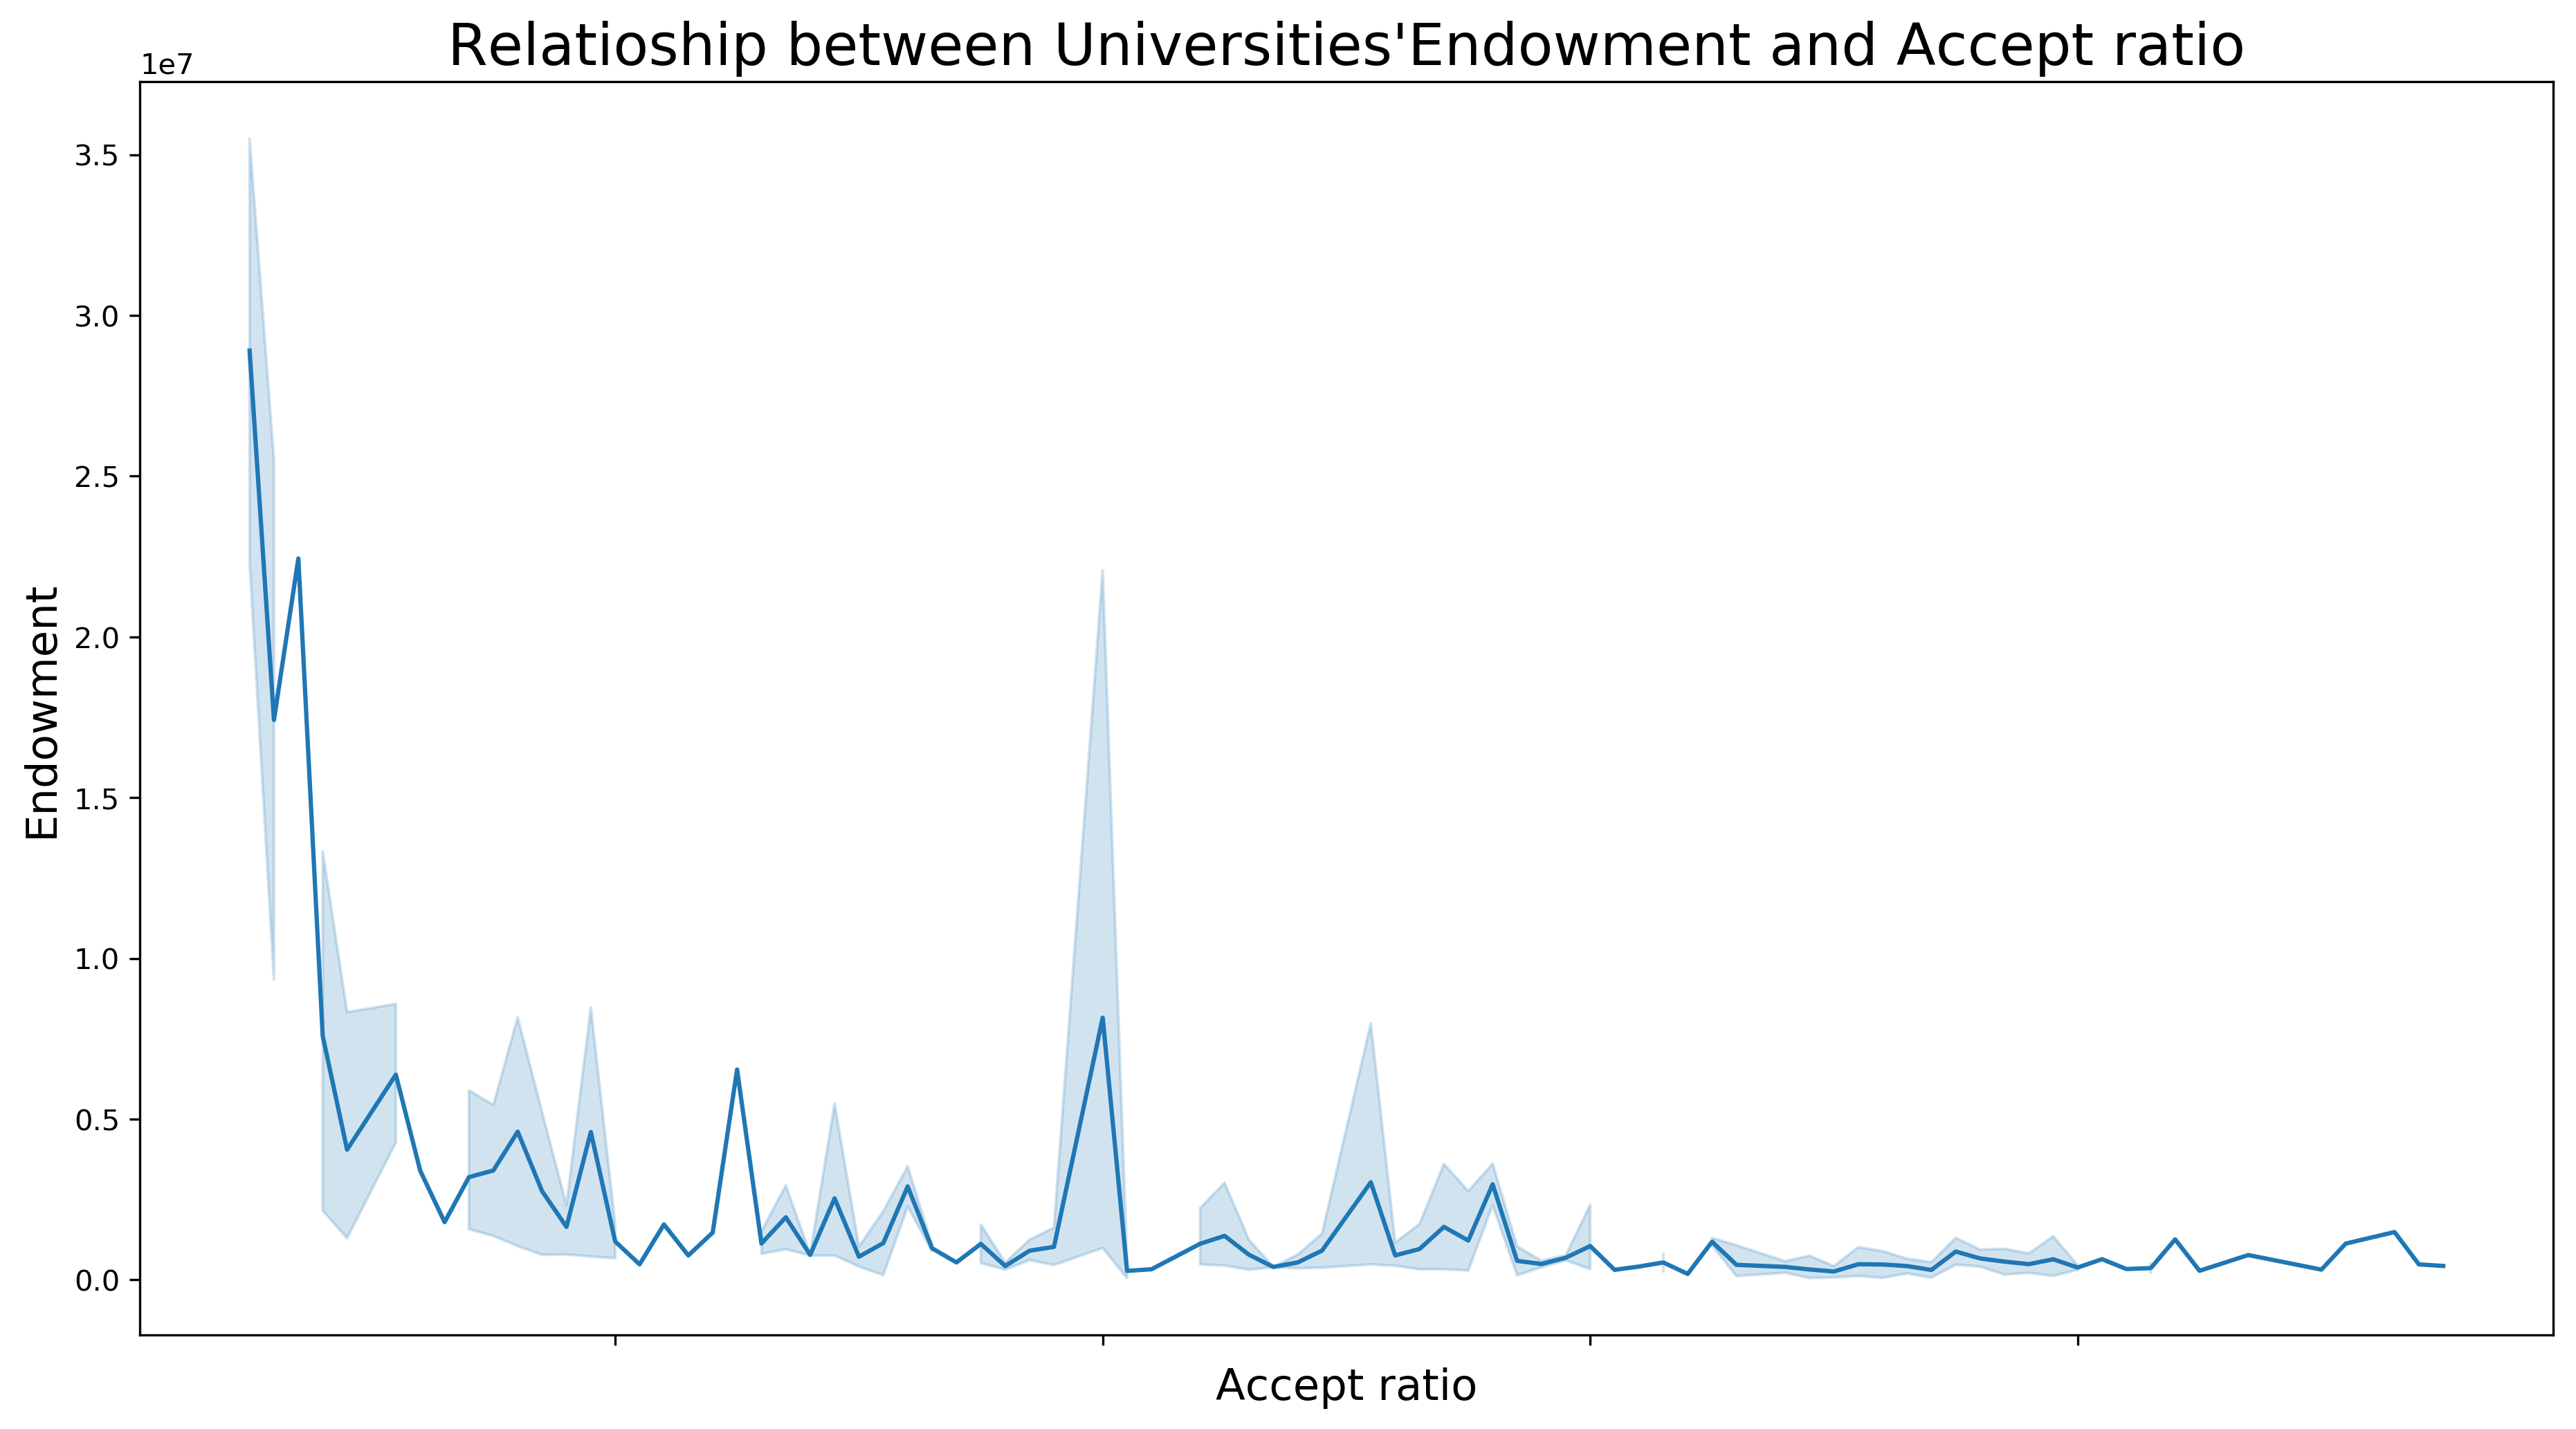

In [41]:
fig, ax = plt.subplots(1, 1, figsize = (15, 8), dpi=300)
sns.lineplot(data['Accept ratio'],data['Endowment'])
ax.set(xticklabels=[])
ax.axes.set_title("Relatioship between Universities'Endowment and Accept ratio",fontsize=20)
ax.set_xlabel("Accept ratio",fontsize=15)
ax.set_ylabel("Endowment",fontsize=15)

Text(0,0.5,'Endowment')

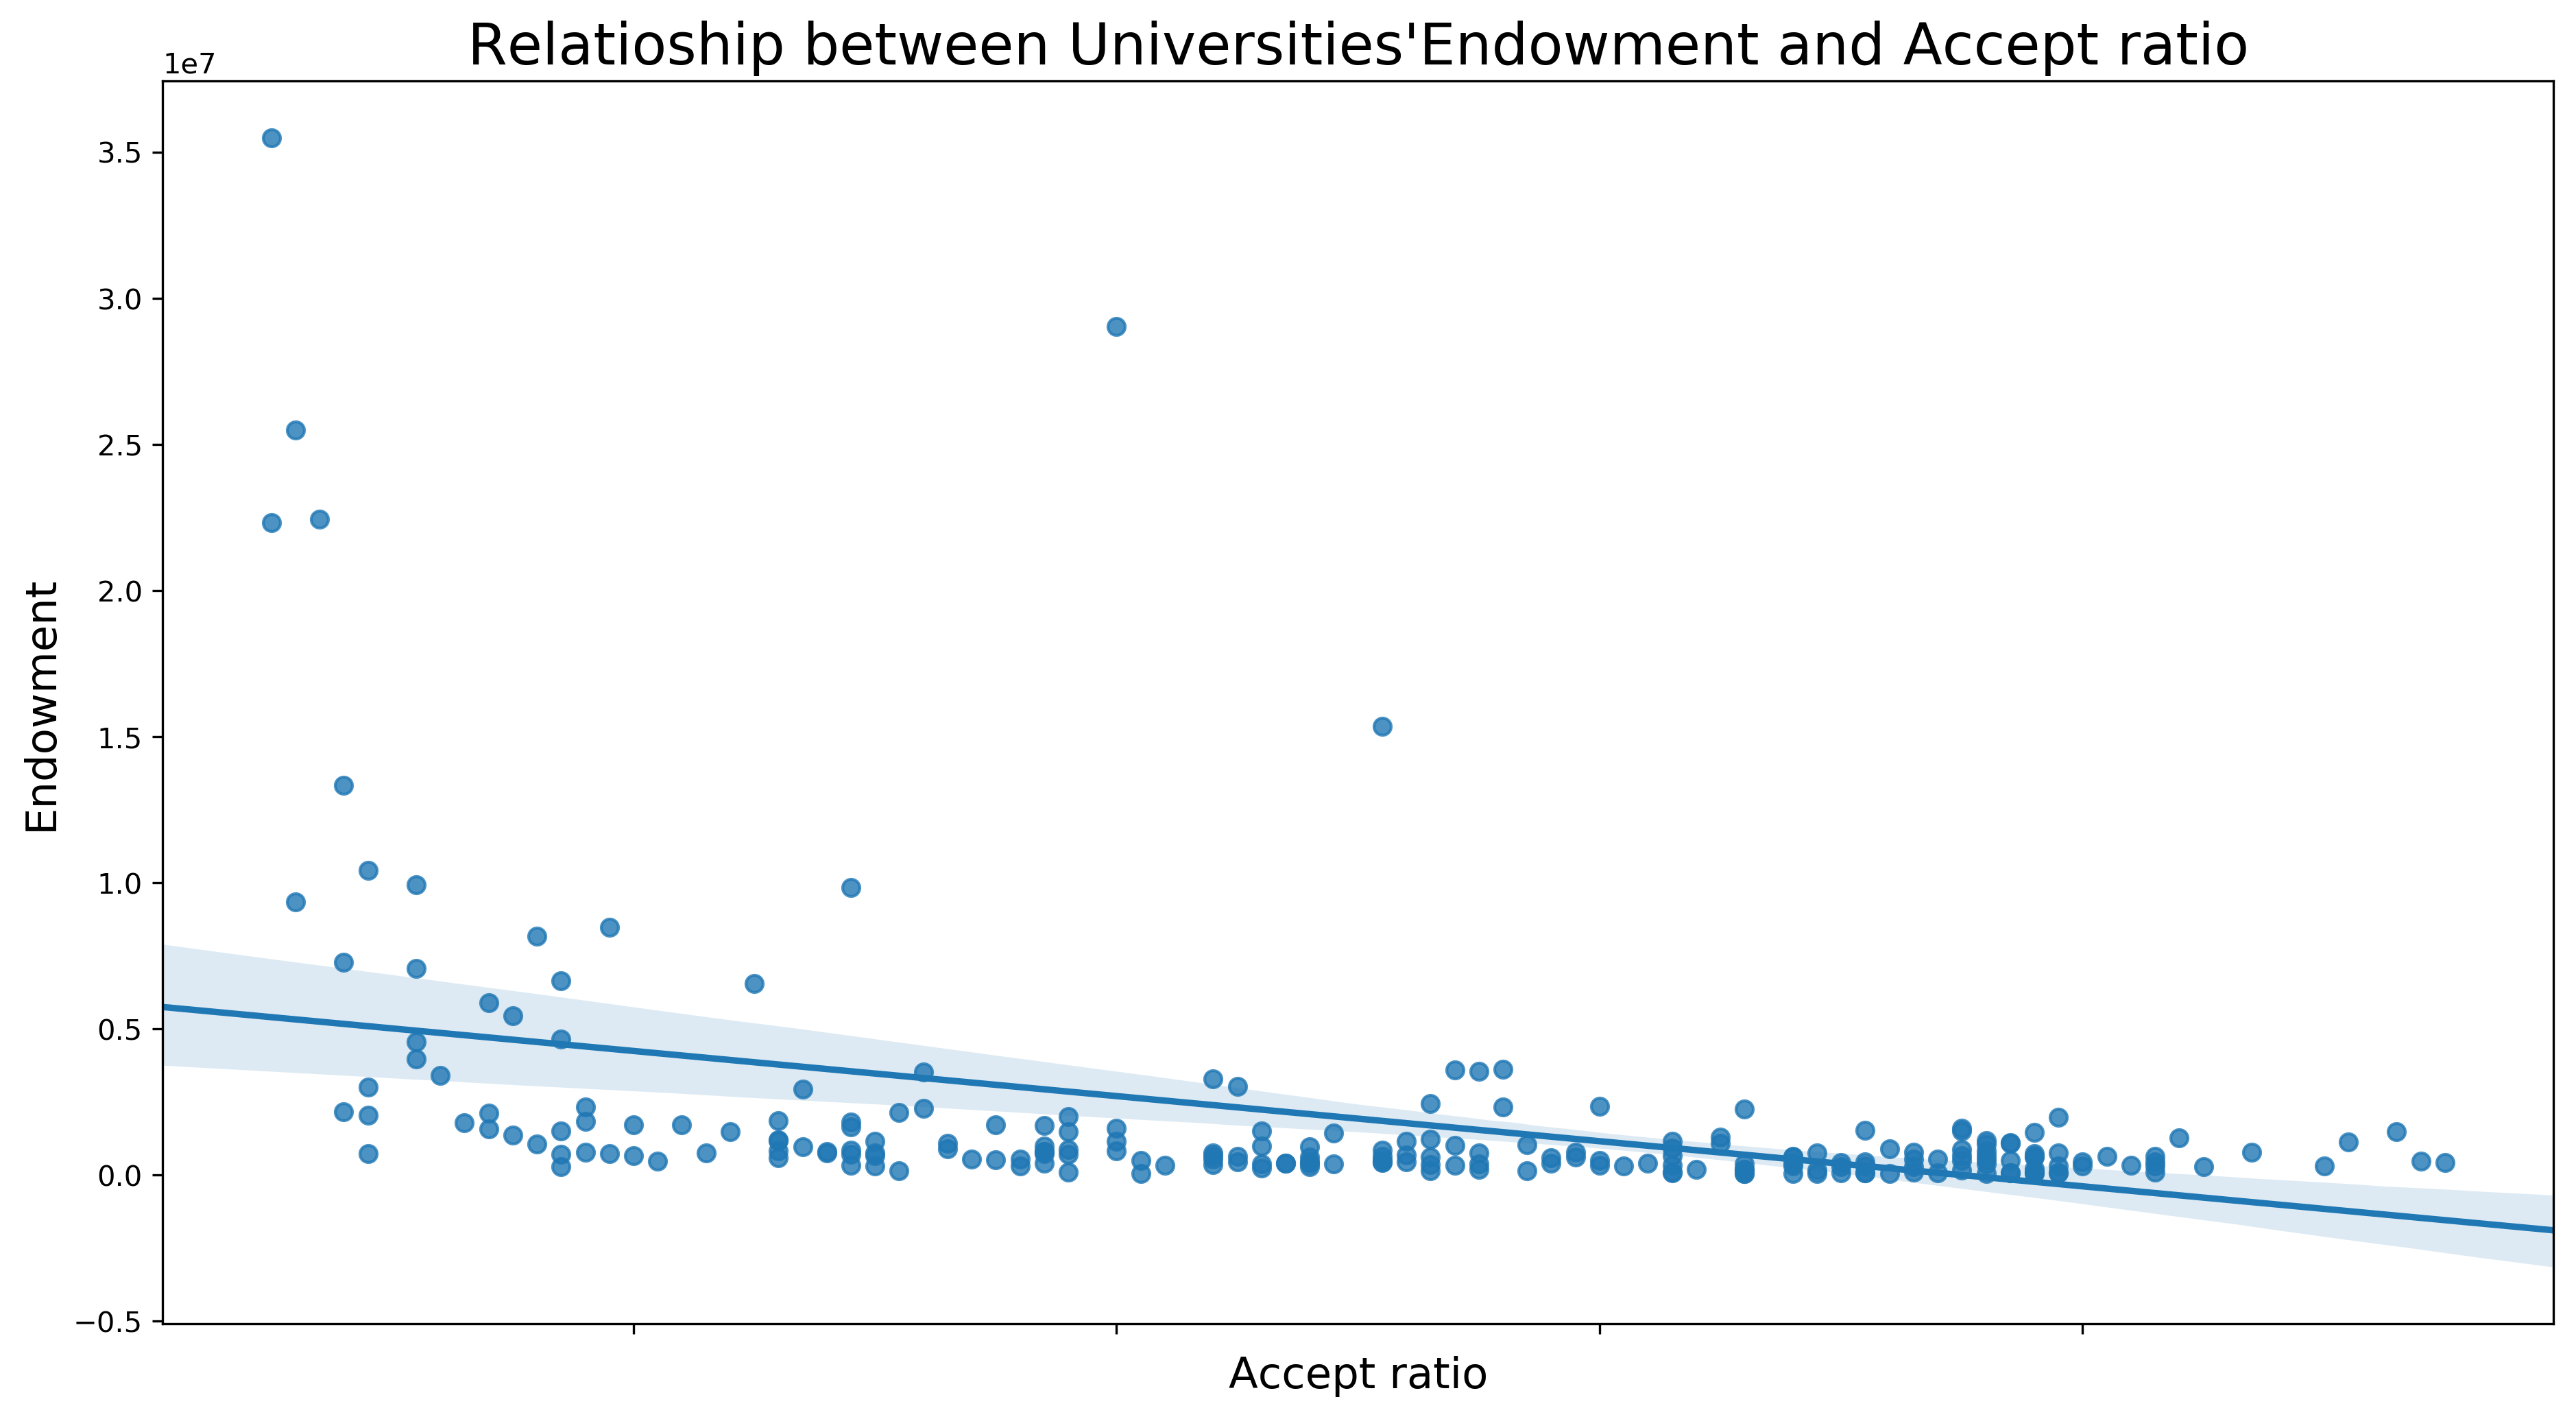

In [50]:
fig, ax = plt.subplots(1, 1, figsize = (15, 8), dpi=300)
sns.regplot(data['Accept ratio'],data['Endowment'])
ax.set(xticklabels=[])
ax.axes.set_title("Relatioship between Universities'Endowment and Accept ratio",fontsize=20)
ax.set_xlabel("Accept ratio",fontsize=15)
ax.set_ylabel("Endowment",fontsize=15)

## 5. Correlation matrix

In [45]:
# Standardize the data
data1=data.drop(['University'],axis=1)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(data1)
data_normalized=pd.DataFrame(np_scaled)
data_normalized.columns=data1.columns
data_normalized.head()

GPA  Loan rate  Enrollment  Endowment  Graduation rate       SAT  \
0  1.000000   0.365159    0.130413   1.000000         0.924051  0.928896   
1  0.736842   0.781426    0.874122   0.817895         0.531646  0.626324   
2  0.863158   0.381979    0.102894   0.717691         0.924051  0.930408   
3  0.894737   0.127483    0.101294   0.631564         0.962025  0.918306   
4  0.894737   0.364348    0.137614   0.627967         0.784810  0.901664   

   Accept ratio   Tuition  Public/Private  Money_used  
0      0.000000  0.480875             0.0         1.0  
1      0.388889  0.083815             1.0         0.0  
2      0.011111  0.505949             0.0         1.0  
3      0.022222  0.462369             0.0         1.0  
4      0.000000  0.487709             0.0         1.0

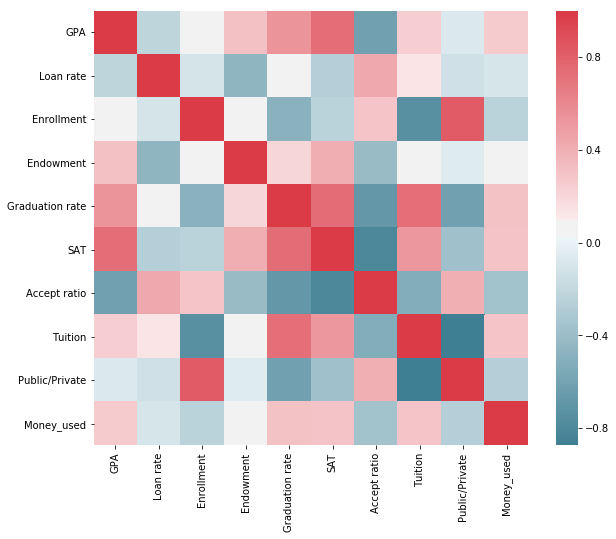

In [46]:
import seaborn as sns
import matplotlib.pyplot as pl

f, ax = pl.subplots(figsize=(10, 8))
corr = data_normalized.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
pl.show()

# Part B. PCA analysis

## 1. Create a dataset where all universities names are replaced by their initials

In [52]:
from bs4 import BeautifulSoup
import urllib.request

In [53]:
url = 'https://en.wikipedia.org/wiki/List_of_colloquial_names_for_universities_and_colleges_in_the_United_States'
ourUrl=urllib.request.urlopen(url)
soup=BeautifulSoup(ourUrl,'html.parser')
label = []
content = soup.find('div',{'class':'mw-parser-output'})
for row in content.find_all('ul'):
    for r in row.find_all('li'):
        label.append(r.get_text())
label = label[28:]
tag = []
name = []
for i in label:
    tag.append(i.split(' - ')[0])
    name.append(i.split(' - ')[1])

In [54]:
df = pd.read_csv('endowment_2018.csv')
df.head()
U_tag = []
for i in range(df.shape[0]):
    b=0
    for j in range(len(name)):
        if df['University'][i].replace('--',' at ') in name[j]:
            U_tag.append(tag[j])
            b=1
            break
    if b==0:
        if df['University'][i].startswith('University') or df['University'][i].startswith('College'):
            s=''
            for word in df['University'][i].split():
                s+=word[0:1]
            U_tag.append(s)
        else:
            U_tag.append(df['University'][i].split(' ')[0])
            
len(U_tag)
# len(df['University'])
for i in range(len(U_tag)):
    U_tag[i] = U_tag[i].split('or')[0]

In [ ]:
Statistic_m = df
import plotly.plotly as py
import plotly.graph_objs as go

c_value = [i for i in range(25)]
plot_data = [
    go.Parcoords(
        line = dict(color = c_value, 
                    colorscale = 'Jet',
                    showscale = True,
                   reversescale = True,
                   cmin = 0,
                   cmax = 25),
        dimensions = list([
            dict(range = [min(Statistic_m['GPA']),max(Statistic_m['GPA'])],
                 label = 'GPA', values = Statistic_m['GPA']),
            dict(range = [min(Statistic_m['Loan rate']),max(Statistic_m['Loan rate'])],
                 label = 'Loan rate', values = Statistic_m['Loan rate']),
            dict(range = [min(Statistic_m['Enrollment']),max(Statistic_m['Enrollment'])],
                 label = 'Enrollment', values = Statistic_m['Enrollment']),
            dict(range = [min(Statistic_m['Endowment']),max(Statistic_m['Endowment'])],
                 label = 'Endowment', values = Statistic_m['Endowment']),
            dict(range = [min(Statistic_m['Graduation rate']),max(Statistic_m['Graduation rate'])],
                 label = 'Graduation rate', values = Statistic_m['Graduation rate']),
            dict(range = [min(Statistic_m['SAT']),max(Statistic_m['SAT'])],
                 label = 'SAT', values = Statistic_m['SAT']),
            dict(range = [min(Statistic_m['Accept ratio']),max(Statistic_m['Accept ratio'])],
                 label = 'Accept ratio', values = Statistic_m['Accept ratio']),
            dict(range = [min(Statistic_m['Tuition']),max(Statistic_m['Tuition'])],
                 label = 'Tuition', values = Statistic_m['Tuition']),
            dict(range = [min(Statistic_m['Public/Private']),max(Statistic_m['Public/Private'])],
                 label = 'Public/Private', values = Statistic_m['Public/Private']),
            dict(range = [min(Statistic_m['Money_used']),max(Statistic_m['Money_used'])],
                 label = 'Money_used', values = Statistic_m['Money_used']),
        ])
    )
]

py.iplot(plot_data, filename = 'parcoord-close-price')

In [ ]:
dataa = df.drop('University',axis=1)
dataa.to_csv('endowments_2018a.csv')

## 2. Conduct PCA analysis

In [56]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pylab as pylab
from matplotlib import cm

In [78]:
dataa=pd.read_csv('endowments_2018a.csv')
dataa=dataa.drop(['Unnamed: 0'],axis=1)

In [79]:
scaler = StandardScaler()
pdata = dataa.drop('University_Tag',axis=1)
pdata = pdata.drop('Money_used',axis=1).values
dist = scaler.fit_transform(pdata)

In [80]:
pca=PCA(n_components=8)
pca.fit(dist)
print('\n PC components \n')
print(pca.components_)
newdata=pca.transform(dist)


 PC components 

[[ 0.2891904  -0.08255745 -0.29367355  0.17115742  0.4246392   0.40697567
  -0.4013931   0.40117892 -0.35497263]
 [ 0.34057283 -0.44969041  0.42118041  0.401385   -0.05062373  0.23639745
  -0.23959108 -0.29621407  0.37375479]
 [-0.48363995 -0.58895351 -0.30390874  0.39448749 -0.25481453 -0.20508585
  -0.04748818  0.05132611 -0.24364955]
 [-0.09559289  0.51015847  0.18167818  0.78360342  0.08483944 -0.03215061
   0.24570922  0.07759521 -0.09451785]
 [-0.69826813  0.07902023  0.36548869 -0.10831142  0.38131141  0.12394567
  -0.42306162  0.009076    0.14505048]
 [ 0.06446351  0.03883638  0.52680513 -0.09925824 -0.55611149 -0.01249737
  -0.21457762  0.51271783 -0.29769287]
 [-0.08589025  0.40173611 -0.40230807  0.0840003  -0.51647421  0.279053
  -0.47730299 -0.23517625  0.1859595 ]
 [ 0.24093908  0.1146243  -0.01649637  0.07655716  0.15338031 -0.79171402
  -0.51373566 -0.08871097 -0.02336523]]


In [84]:
feature_name = dataa.drop('University_Tag',axis=1).drop('Money_used',axis=1).columns
pcat = pd.DataFrame()
pcat['feature_name']=feature_name
for i in range(len(pca.components_)):
    pcat['pc'+str(i+1)] = pca.components_[i]
pcat

feature_name       pc1       pc2       pc3       pc4       pc5  \
0              GPA  0.289190  0.340573 -0.483640 -0.095593 -0.698268   
1        Loan rate -0.082557 -0.449690 -0.588954  0.510158  0.079020   
2       Enrollment -0.293674  0.421180 -0.303909  0.181678  0.365489   
3        Endowment  0.171157  0.401385  0.394487  0.783603 -0.108311   
4  Graduation rate  0.424639 -0.050624 -0.254815  0.084839  0.381311   
5              SAT  0.406976  0.236397 -0.205086 -0.032151  0.123946   
6     Accept ratio -0.401393 -0.239591 -0.047488  0.245709 -0.423062   
7          Tuition  0.401179 -0.296214  0.051326  0.077595  0.009076   
8   Public/Private -0.354973  0.373755 -0.243650 -0.094518  0.145050   

        pc6       pc7       pc8  
0  0.064464 -0.085890  0.240939  
1  0.038836  0.401736  0.114624  
2  0.526805 -0.402308 -0.016496  
3 -0.099258  0.084000  0.076557  
4 -0.556111 -0.516474  0.153380  
5 -0.012497  0.279053 -0.791714  
6 -0.214578 -0.477303 -0.513736  
7  0.512718 -0.235176 -0.088711  
8 -0.297693  0.185959 -0.023365

In [85]:
print('\n Explained variance rations\n')
print(pca.explained_variance_ratio_)
cumlative_explained_varian_ratios=np.cumsum(pca.explained_variance_ratio_)
print('\n Cumulative Explained Variance Ratio\n')
print(cumlative_explained_varian_ratios)


 Explained variance rations

[0.48168349 0.24959207 0.10776657 0.06378814 0.03049586 0.02105667
 0.0180264  0.01714928]

 Cumulative Explained Variance Ratio

[0.48168349 0.73127556 0.83904213 0.90283027 0.93332613 0.9543828
 0.9724092  0.98955848]


In [91]:
pca_number=list(range(1,9))
cumulative_explained_variance_ratio=[0.48168349,0.73127556,0.83904213,0.90283027,0.93332613,0.9543828,0.9724092,0.98955848]
ratios=[]
cumulative_ratio=[]
for i in cumulative_explained_variance_ratio:
    ratios.append('{:.2%}'.format(i))
    cumulative_ratio.append(i*100)
cumulative_ratio  

[48.168349,
 73.127556,
 83.904213,
 90.283027,
 93.332613,
 95.43827999999999,
 97.24092,
 98.955848]

<function matplotlib.pyplot.show(*args, **kw)>

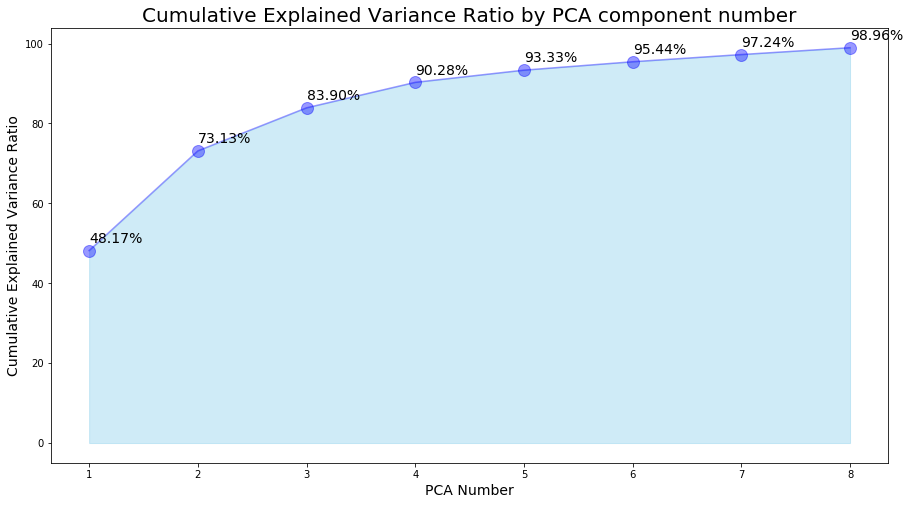

In [93]:
fig, ax = plt.subplots(figsize=(15,8))
plt.fill_between(pca_number,cumulative_ratio,color='skyblue',alpha=0.4)
plt.plot(pca_number,cumulative_ratio,color='b',marker='o',markersize=12,alpha=0.4)
for i, txt in enumerate(ratios):
    plt.annotate(txt,(pca_number[i],cumulative_ratio[i]+2),fontsize=14)
plt.xlabel('PCA Number',fontsize=14)
plt.ylabel('Cumulative Explained Variance Ratio',fontsize=14)
plt.title('Cumulative Explained Variance Ratio by PCA component number',fontsize=20)
plt.show

In [86]:
# newdata[0][:2]
x = []
y = []
z = []
for i in range(len(newdata)):
    x.append(newdata[i][0])
    y.append(newdata[i][1])
    z.append(newdata[i][2])
label = dataa['University_Tag'].values

In [87]:
fp1 = []
fp2 = []
for i in range(9):
    fp1.append(pca.components_[0][i])
    fp2.append(pca.components_[1][i])
fname = dataa.drop('University_Tag',axis=1).columns

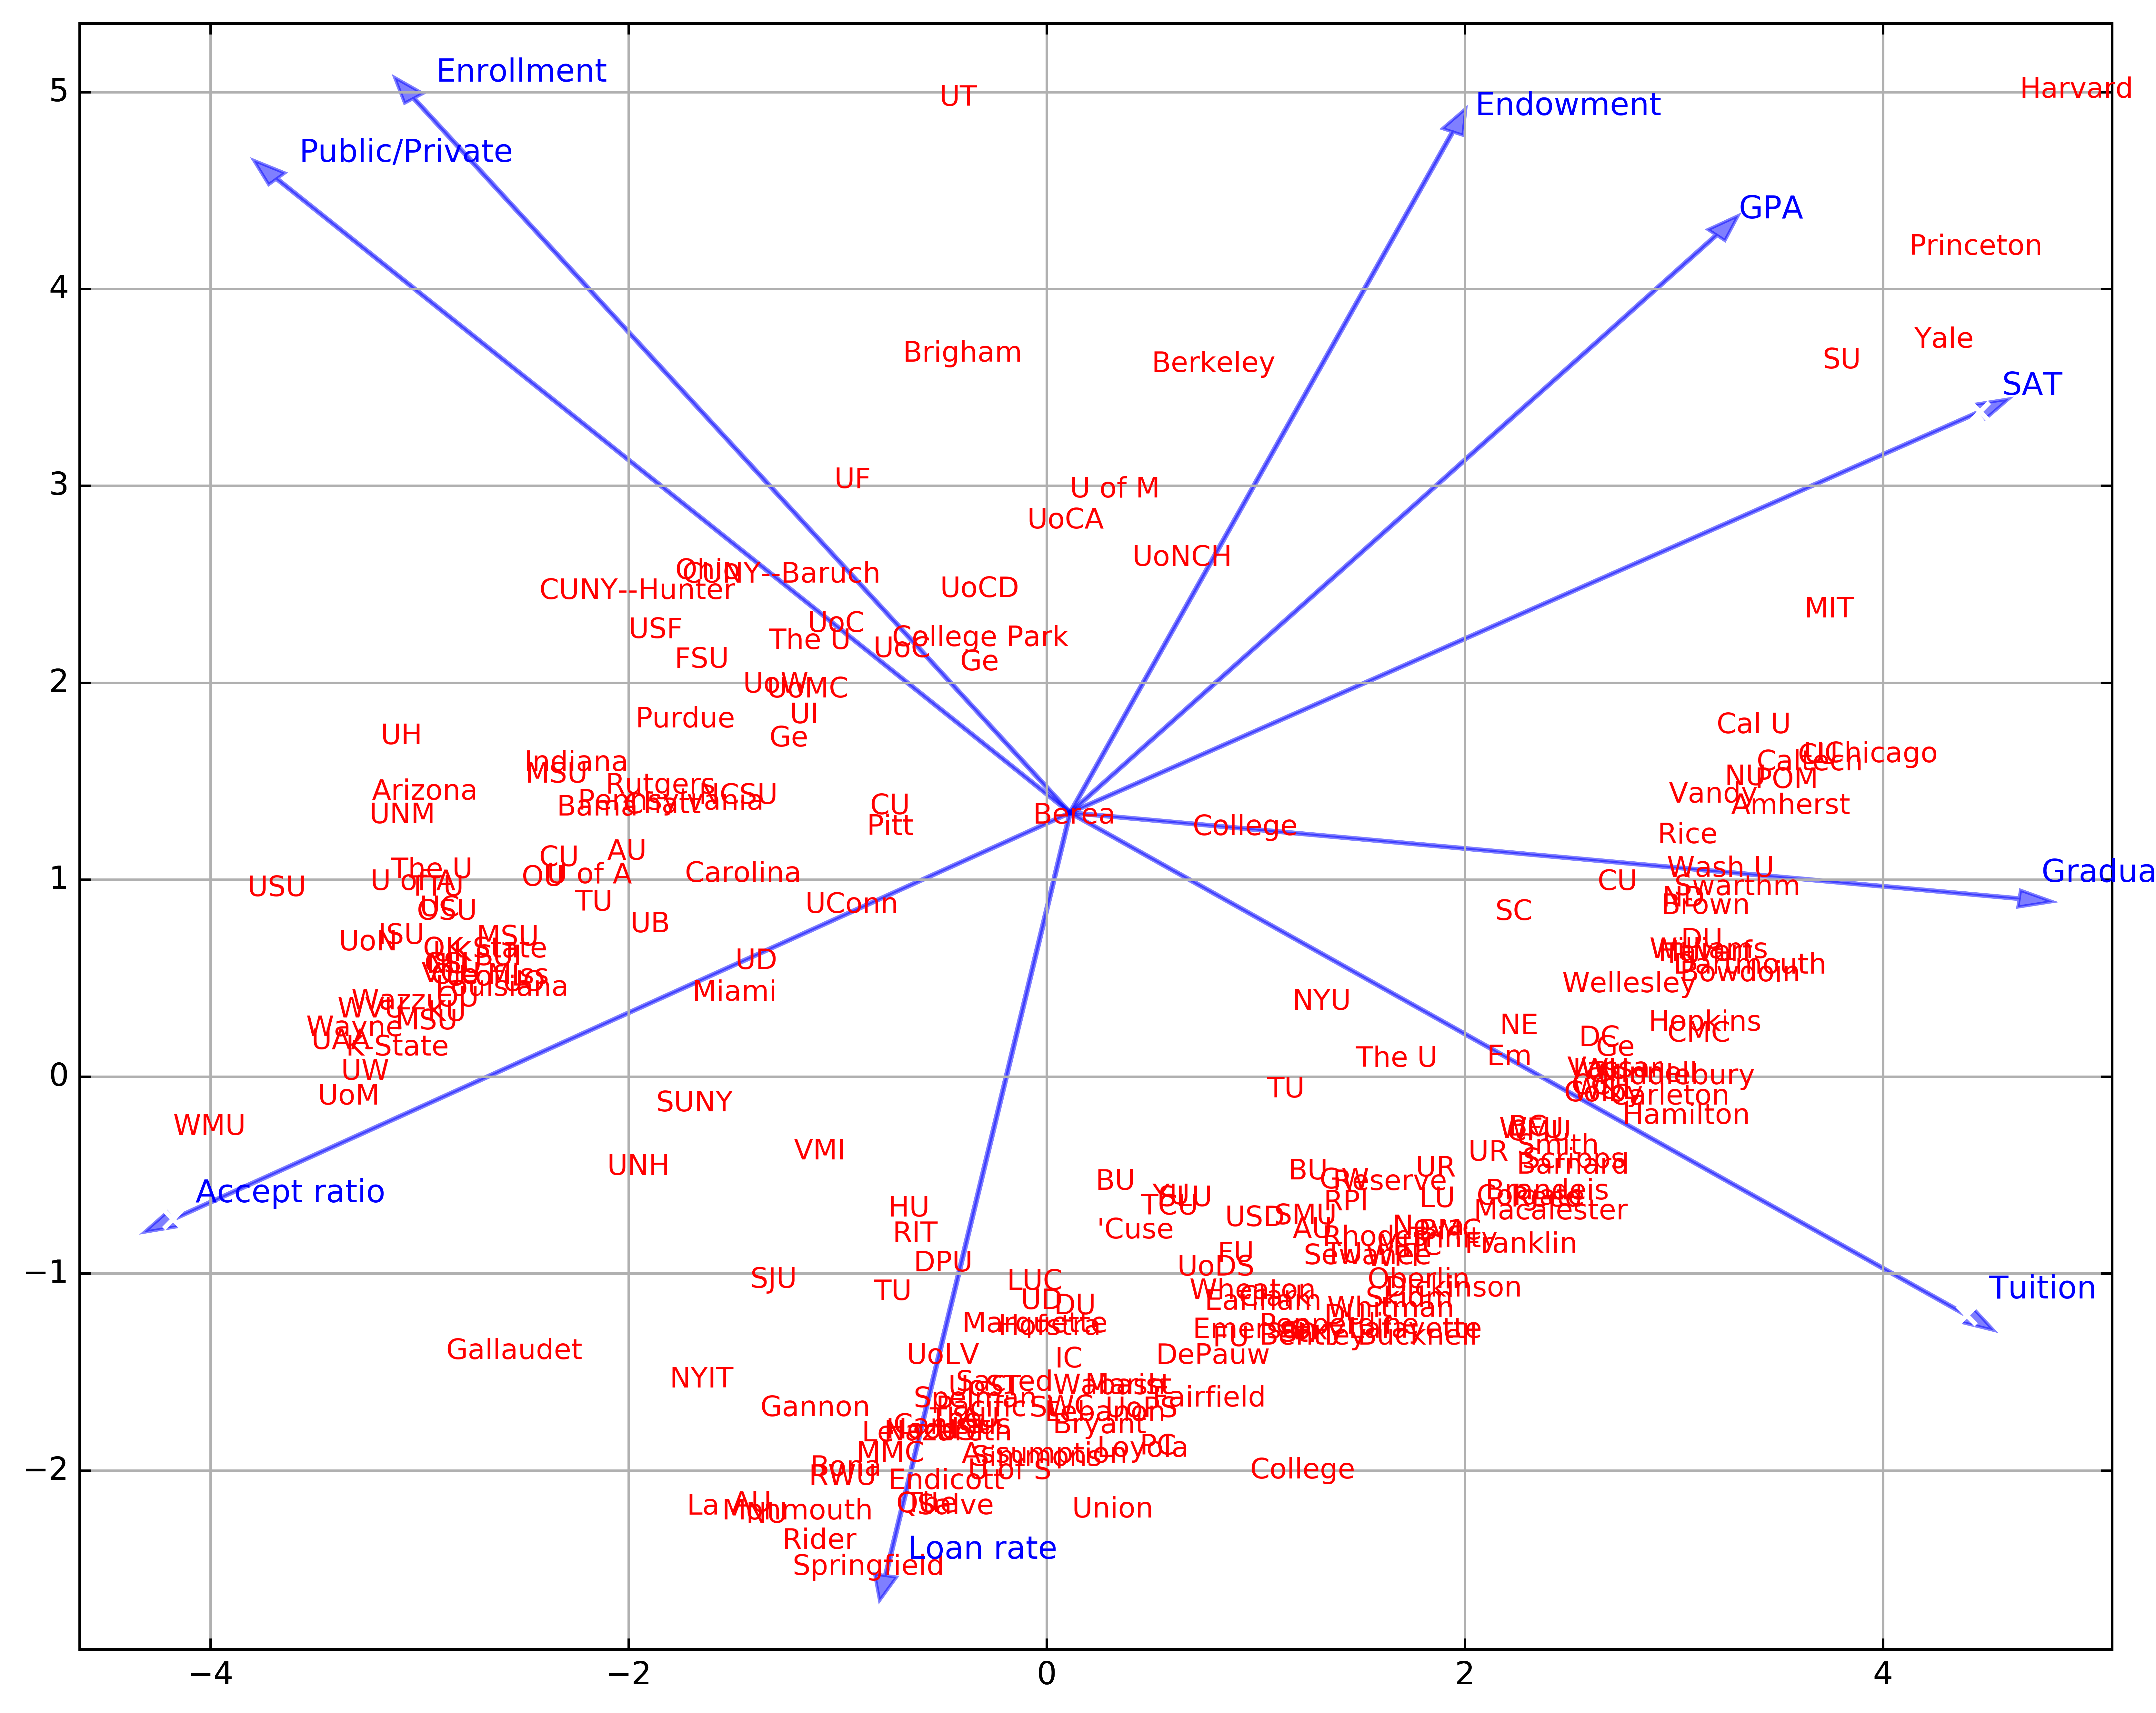

In [88]:
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
f= plt.figure(figsize=(10, 8),dpi=700)
ax1 = HostAxes(f,[0, 0, 0.9, 0.9])
ax2 = ParasiteAxes(ax1)
ax1.parasites.append(ax2)
f.add_axes(ax1)
plt.grid(True)
# coeff=np.transpose(pca.components_)
for i in range(9):
    ax2.arrow(0, 0, fp1[i],fp2[i],color = 'b',alpha = 0.5,head_width=0.01)
for i in range(len(newdata)):
    ax1.scatter(x[i],y[i],marker  ='x',color = 'white')
    ax1.text(x[i],y[i],label[i],fontsize = 9, color = 'red')
for i in range(9):
    ax2.scatter(fp1[i],fp2[i],marker  ='x',color = 'white')
    ax2.text(fp1[i]+0.01,fp2[i]+0.01,fname[i],fontsize = 10, color = 'blue')
plt.show()

In [89]:
dataa['pc1'] = x
dataa['pc2'] = y
dataa['pc3'] = z

In [93]:
import plotly
plotly.tools.set_credentials_file(username='ali66',api_key='7MIV3APEHVoMY27dmEW9')

In [95]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x=dataa[dataa['Money_used'] == 0]['pc1'].values,
    y=dataa[dataa['Money_used'] == 0]['pc2'].values,
    z=dataa[dataa['Money_used'] == 0]['pc3'].values,
    name = 'poorly used',
    mode='markers',
    text = dataa[dataa['Money_used'] == 0]['University_Tag'].values,
    marker=dict(
#         color='rgb(200, 200, 200)',
        size=8,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)

trace2 = go.Scatter3d(
    x=dataa[dataa['Money_used'] == 1]['pc1'].values,
    y=dataa[dataa['Money_used'] == 1]['pc2'].values,
    z=dataa[dataa['Money_used'] == 1]['pc3'].values,
    name = 'well used',
    text = dataa[dataa['Money_used'] == 1]['University_Tag'].values,
    mode='markers',
    marker=dict(
        color='rgb(127, 127, 127)',
        size=8,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)

data = [trace1, trace2]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~ali66/0 or inside your plot.ly account where it is named 'simple-3d-scatter'


## Part C. Twitter analysis
## 1. Use twitter API to collect the number of followers, followings fot the 232 rich universities

In [ ]:
followers = []
tweets = []
following = []
for i in df['University']:
    i = i.replace(' ','%20')
    url = 'https://twitter.com/search?f=users&vertical=news&q='+i+'&src=typd&lang=en'
    ourUrl=urllib.request.urlopen(url)
    soup=BeautifulSoup(ourUrl,'html.parser')
    url = soup.find('div',{'class':'js-stream-item'}).find('a',{'class':'fullname ProfileNameTruncated-link u-textInheritColor js-nav'})['href']
    print(url)
    urld = 'https://twitter.com'+url
    ourUrl=urllib.request.urlopen(urld)
    soup=BeautifulSoup(ourUrl,'html.parser')
    tweets.append(soup.find('li',{'class':'ProfileNav-item ProfileNav-item--tweets is-active'}).find('span',{'class':'ProfileNav-value'}).get_text())
    following.append(soup.find('li',{'class':'ProfileNav-item ProfileNav-item--following'}).find('span',{'class':'ProfileNav-value'}).get_text())
    followers.append(soup.find('li',{'class':'ProfileNav-item ProfileNav-item--followers'}).find('span',{'class':'ProfileNav-value'}).get_text())

In [ ]:
dataa['followers'] = followers
dataa['tweets'] = tweets
dataa['following'] = following

In [ ]:
dataa.to_csv('endowments_ 2018_2.csv')

## 2. Check some hypothesis

In [97]:
twitter=pd.read_csv('endowments_ 2018_2.csv')
twitter.columns

Index(['Unnamed: 0', 'GPA', 'Loan rate', 'Enrollment', 'Endowment',
       'Graduation rate', 'SAT', 'Accept ratio', 'Tuition', 'Public/Private',
       'Money_used', 'University_Tag', 'pc1', 'pc2', 'pc3', 'followers',
       'tweets', 'following'],
      dtype='object')

In [101]:
twitter.dtypes

Unnamed: 0           int64
GPA                float64
Loan rate          float64
Enrollment           int64
Endowment          float64
Graduation rate    float64
SAT                  int64
Accept ratio       float64
Tuition              int64
Public/Private       int64
Money_used           int64
University_Tag      object
pc1                float64
pc2                float64
pc3                float64
followers          float64
tweets             float64
following          float64
dtype: object

In [98]:
followers=twitter['followers']
tweets=twitter['tweets']
following=twitter['following']

In [99]:
followers_new=[]
tweets_new=[]
following_new=[]
for i in followers:
    a=i.replace(',','')
    a=a.replace('\r\n','')
    if 'K' in i:
        b=float(a.replace('K',''))
        b=b*1000
        followers_new.append(b)
    else:
        followers_new.append(float(a))

for i in tweets:
    a=i.replace(',','')
    a=a.replace('\r\n','')
    if 'K' in i:
        b=float(a.replace('K',''))
        b=b*1000
        tweets_new.append(b)
    else:
        tweets_new.append(float(a))
        
for i in following:
    a=i.replace(',','')
    a=a.replace('\r\n','')
    if 'K' in i:
        b=float(a.replace('K',''))
        b=b*1000
        following_new.append(b)
    else:
        following_new.append(float(a))

In [100]:
twitter['followers']=followers_new
twitter['tweets']=tweets_new
twitter['following']=following_new

## 1>The richer a university, the more followers in its twitter

In [24]:
from sklearn.linear_model import LinearRegression

Text(0,0.5,'followers')

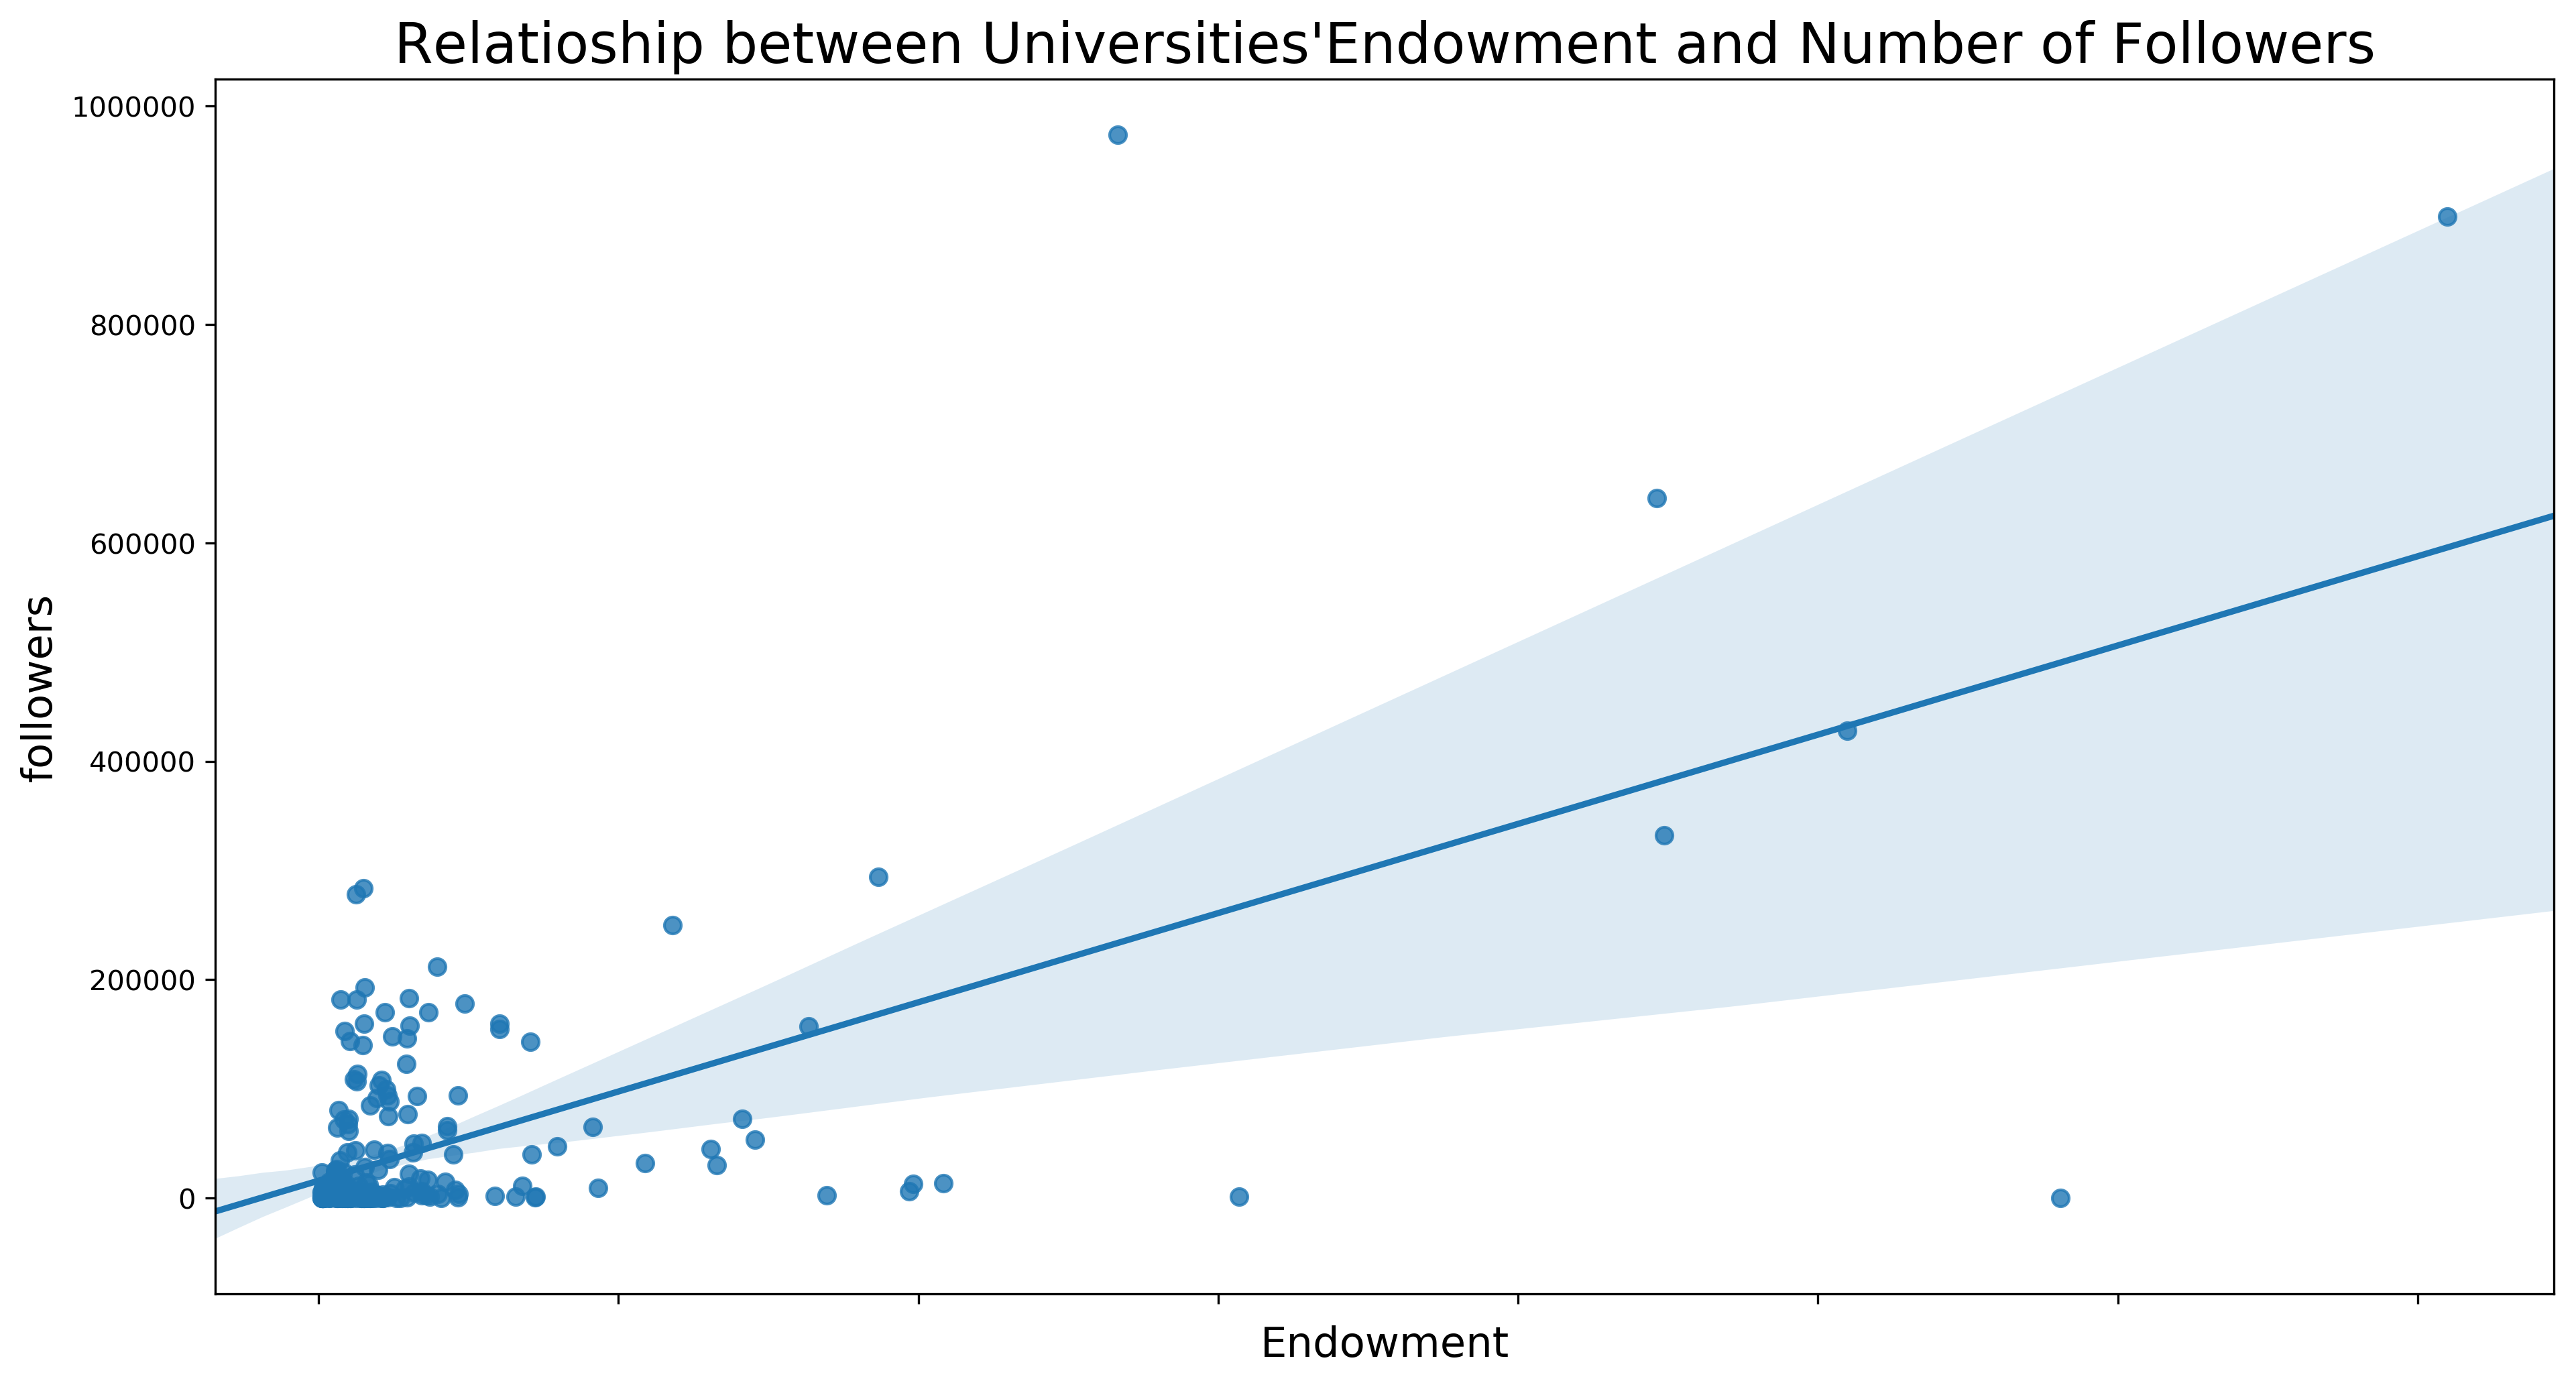

In [25]:
fig, ax = plt.subplots(1, 1, figsize = (15, 8), dpi=300)
sns.regplot(twitter['Endowment'],twitter['followers'])
ax.set(xticklabels=[])
ax.axes.set_title("Relatioship between Universities'Endowment and Number of Followers",fontsize=20)
ax.set_xlabel("Endowment",fontsize=15)
ax.set_ylabel("followers",fontsize=15)

In [26]:
# Build simple linear regression
import statsmodels.api as sm
model=sm.OLS(twitter['followers'],twitter['Endowment']).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              followers   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     205.5
Date:                Wed, 12 Dec 2018   Prob (F-statistic):           9.24e-34
Time:                        18:27:49   Log-Likelihood:                -2974.8
No. Observations:                 232   AIC:                             5952.
Df Residuals:                     231   BIC:                             5955.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Endowment      0.0177      0.001     14.334      0.000       0.015       0.020
==============================================================================
Omnibus:                      147.520   Durbin-Watson:                   2.488
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5674.420
Skew:                           1.819   Prob(JB):                         0.00
Kurtosis:                      26.954   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# Covriance
X=np.stack((twitter['followers'],twitter['Endowment']),axis=0)
print(np.cov(X))

[[1.29515623e+10 3.11642031e+11]
 [3.11642031e+11 1.90744860e+13]]


## 2> Private universities have more followers than its public peers

In [28]:
twitter=twitter.sort_values(['followers'],ascending=[0])

In [29]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8), dpi=800)
sns.barplot(twitter['University_Tag'],twitter['followers'],hue=twitter['Public/Private'])
ax.set(xticklabels=[])
ax.axes.set_title("Universities' Follower Number by Public or Private",fontsize=20)
ax.set_xlabel("Universities",fontsize=15)
ax.set_ylabel("followers",fontsize=15)
L=ax.legend()
L.get_texts()[0].set_text('Private')
L.get_texts()[1].set_text('Public')

In [30]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8), dpi=800)
plt.bar(twitter['University_Tag'][twitter['Public/Private']==0],twitter['followers'][twitter['Public/Private']==0],color='b')
plt.bar(twitter['University_Tag'][twitter['Public/Private']==1],twitter['followers'][twitter['Public/Private']==1],color='y')


plt.show()

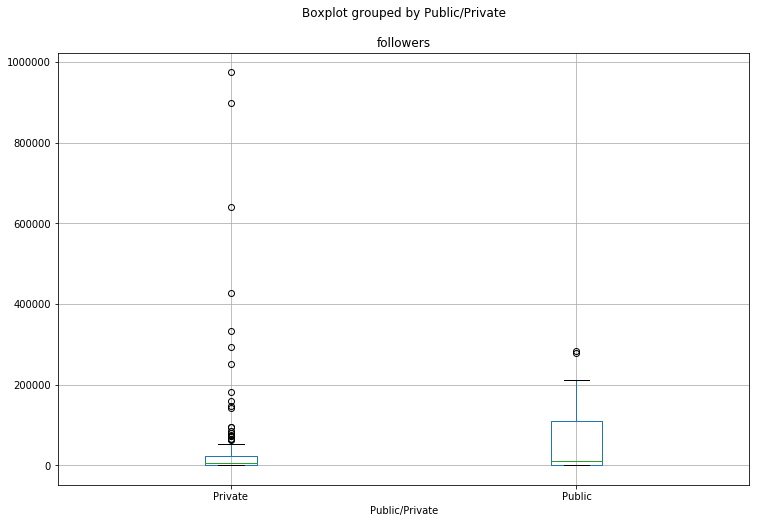

In [31]:
twitter2=twitter
twitter2['Public/Private']=twitter2['Public/Private'].replace(0,'Private')
twitter2['Public/Private']=twitter2['Public/Private'].replace(1,'Public')
twitter2.boxplot('followers', by='Public/Private', figsize=(12, 8))

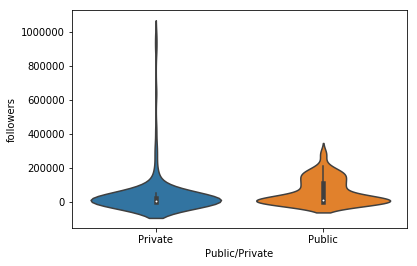

In [33]:
ax=sns.violinplot(x='Public/Private',y='followers',data=twitter2)

In [65]:
twitter['Public/Private']=twitter['Public/Private'].replace('Private',0)
twitter['Public/Private']=twitter['Public/Private'].replace('Public',1)

In [70]:
#Anova test
from scipy import stats
result=stats.f_oneway(twitter['followers'][twitter['Public/Private']==0],twitter['followers'][twitter['Public/Private']==1])
# pvalue >.05 there is no significant effect of school type on the twitter followers
print('Anova Test Summary\n------------------\n')
print('statistic:' ,round(result[0],2))
print('p-value:' ,round(result[1],2))

Anova Test Summary
------------------

statistic: 1.37
p-value: 0.24


In [68]:
result

F_onewayResult(statistic=1.3687912324293734, pvalue=0.2432305824854934)

In [75]:

print(stats.ttest_ind(twitter['followers'][twitter['Public/Private']==0],twitter['followers'][twitter['Public/Private']==1]))

print(stats.ttest_ind(twitter['followers'][twitter['Public/Private']==0],twitter['followers'][twitter['Public/Private']==1],equal_var=False))


Ttest_indResult(statistic=-1.1699535172088567, pvalue=0.24323058248548804)
Ttest_indResult(statistic=-1.3749223244267315, pvalue=0.1705103137550974)


## 3> Visualize the data via PCA by including info you get from twitter


In [18]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pylab as pylab

In [21]:
twitter.columns

Index(['Unnamed: 0', 'GPA', 'Loan rate', 'Enrollment', 'Endowment',
       'Graduation rate', 'SAT', 'Accept ratio', 'Tuition', 'Public/Private',
       'Money_used', 'University_Tag', 'pc1', 'pc2', 'pc3', 'followers',
       'tweets', 'following'],
      dtype='object')

In [22]:
scaler = StandardScaler()
pdata = twitter.drop(['Unnamed: 0','Money_used', 'University_Tag', 'pc1', 'pc2', 'pc3'],axis=1)
dist = scaler.fit_transform(pdata)
pca=PCA(n_components=11)
pca.fit(dist)
newdata=pca.transform(dist)
cumlative_explained_varian_ratios=np.cumsum(pca.explained_variance_ratio_)

In [22]:
pca_number=list(range(1,9))
cumulative_ratio=[0.36411745,0.59198986, 0.68967577, 0.78251582, 0.84817448, 0.90106329, 0.92954478, 0.95116113]
ratios=[]
cumulative_ratios=[]
for i in cumulative_ratio:
    ratios.append('{:.2%}'.format(i))
    cumulative_ratios.append(i*100)
cumulative_ratios

[36.411745,
 59.198986,
 68.967577,
 78.251582,
 84.817448,
 90.106329,
 92.954478,
 95.116113]

<function matplotlib.pyplot.show(*args, **kw)>

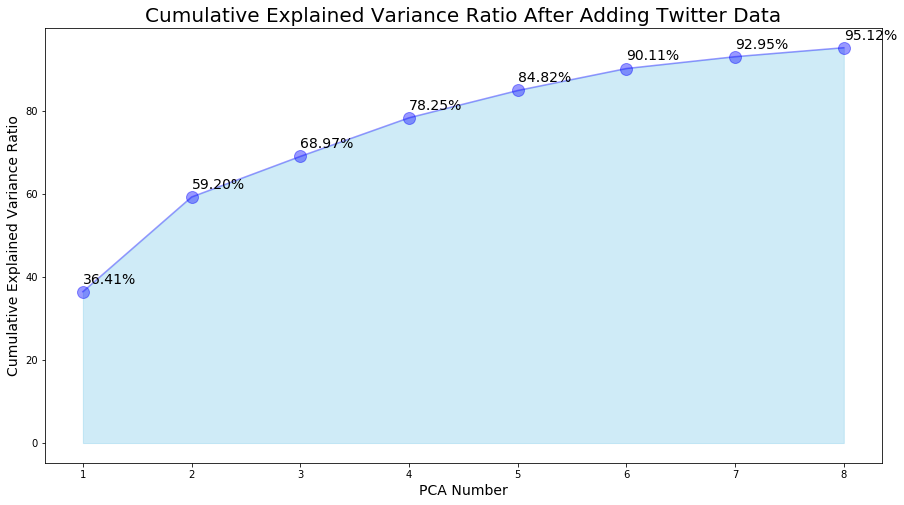

In [23]:
fig, ax = plt.subplots(figsize=(15,8))
plt.fill_between(pca_number,cumulative_ratios,color='skyblue',alpha=0.4)
plt.plot(pca_number,cumulative_ratios,color='b',marker='o',markersize=12,alpha=0.4)
for i, txt in enumerate(ratios):
    plt.annotate(txt,(pca_number[i],cumulative_ratios[i]+2),fontsize=14)
plt.xlabel('PCA Number',fontsize=14)
plt.ylabel('Cumulative Explained Variance Ratio',fontsize=14)
plt.title('Cumulative Explained Variance Ratio After Adding Twitter Data',fontsize=20)
plt.show

In [29]:
# newdata[0][:2]
x = []
y = []
z = []
for i in range(len(newdata)):
    x.append(newdata[i][0])
    y.append(newdata[i][1])
    z.append(newdata[i][2])
label = twitter['University_Tag'].values

fp1 = []
fp2 = []
for i in range(12):
    fp1.append(pca.components_[0][i])
    fp2.append(pca.components_[1][i])
fname = pdata.columns

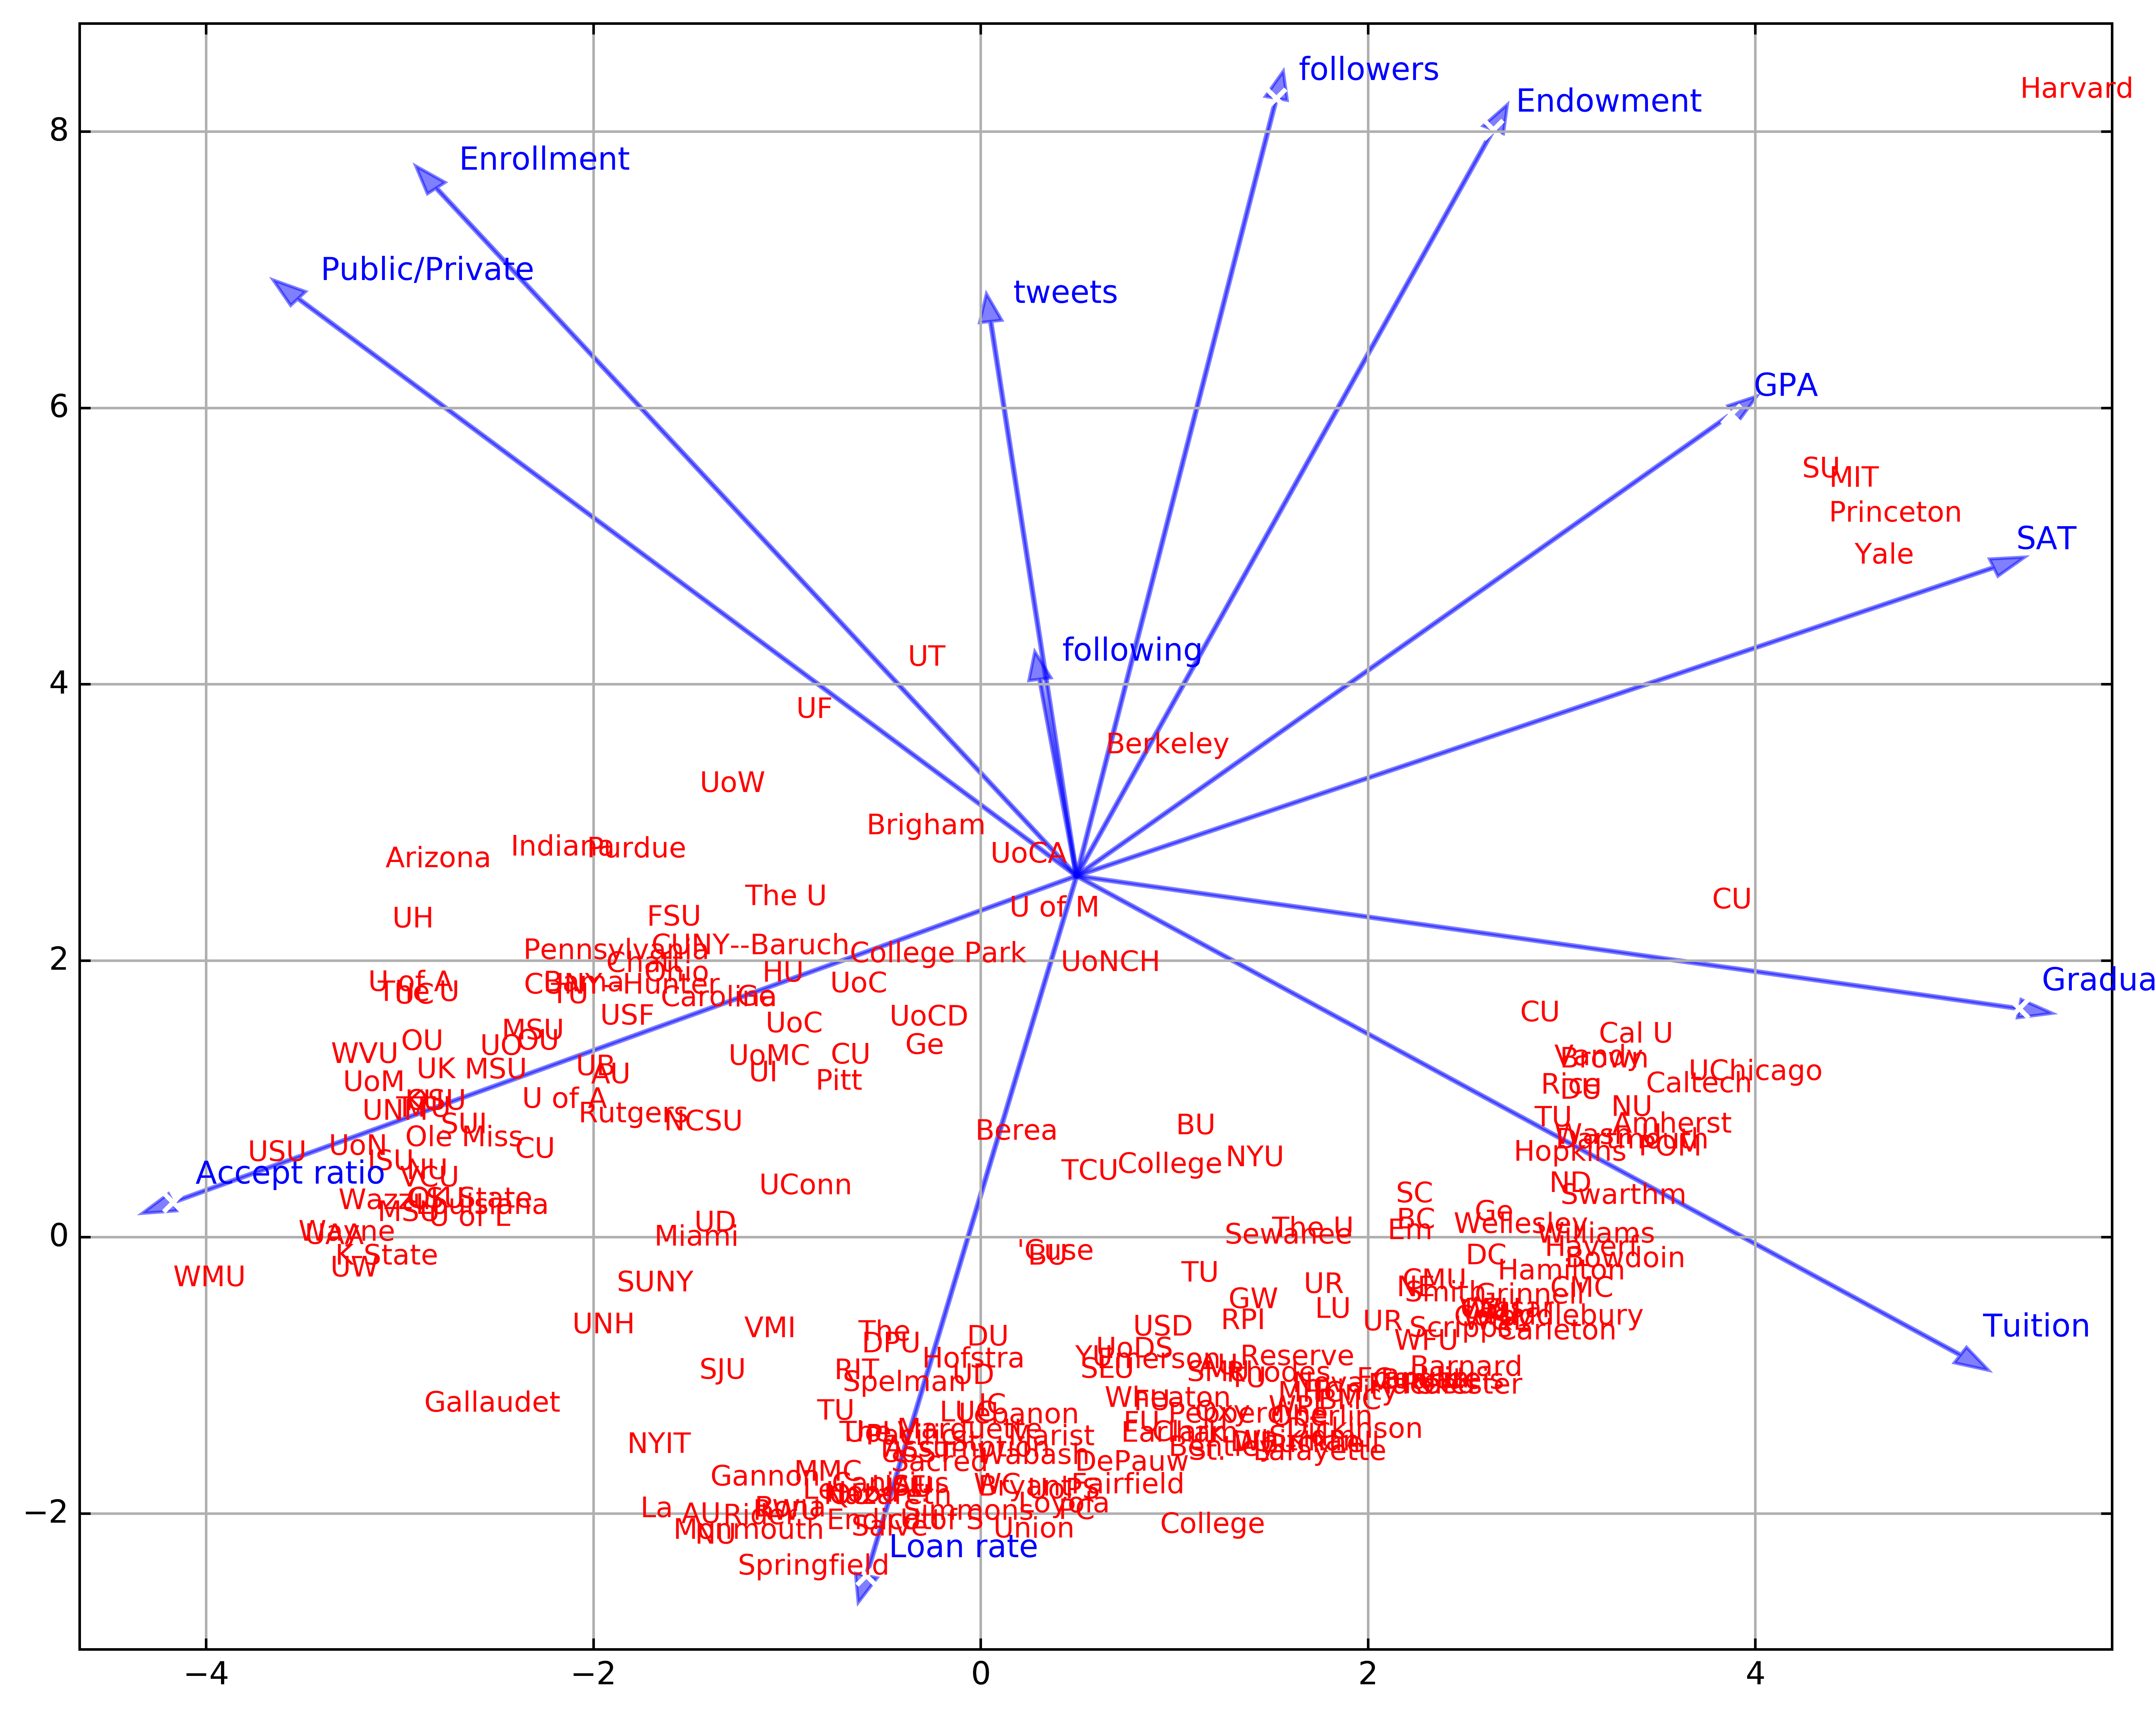

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
f= plt.figure(figsize=(10, 8),dpi=700)
ax1 = HostAxes(f,[0, 0, 0.9, 0.9])
ax2 = ParasiteAxes(ax1)
ax1.parasites.append(ax2)
f.add_axes(ax1)
plt.grid(True)
# coeff=np.transpose(pca.components_)
for i in range(12):
    ax2.arrow(0, 0, fp1[i],fp2[i],color = 'b',alpha = 0.5,head_width=0.01)
for i in range(len(newdata)):
    ax1.scatter(x[i],y[i],marker  ='x',color = 'white')
    ax1.text(x[i],y[i],label[i],fontsize = 9, color = 'red')
for i in range(12):
    ax2.scatter(fp1[i],fp2[i],marker  ='x',color = 'white')
    ax2.text(fp1[i]+0.01,fp2[i]+0.01,fname[i],fontsize = 10, color = 'blue')
plt.show()

In [103]:
tdata=twitter
trace1 = go.Scatter3d(
    x=tdata[tdata['Money_used'] == 0]['pc1'].values,
    y=tdata[tdata['Money_used'] == 0]['pc2'].values,
    z=tdata[tdata['Money_used'] == 0]['pc3'].values,
    name = 'poorly used',
    mode='markers',
    text = tdata[tdata['Money_used'] == 0]['University_Tag'].values,
    marker=dict(
#         color='rgb(200, 200, 200)',
        size=8,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)

trace2 = go.Scatter3d(
    x=tdata[tdata['Money_used'] == 1]['pc1'].values,
    y=tdata[tdata['Money_used'] == 1]['pc2'].values,
    z=tdata[tdata['Money_used'] == 1]['pc3'].values,
    name = 'well used',
    text = tdata[tdata['Money_used'] == 1]['University_Tag'].values,
    mode='markers',
    marker=dict(
        color='rgb(127, 127, 127)',
        size=8,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)

data = [trace1, trace2]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~ali66/0 or inside your plot.ly account where it is named 'simple-3d-scatter'


### 4) Check the correlation matrix with twitter information

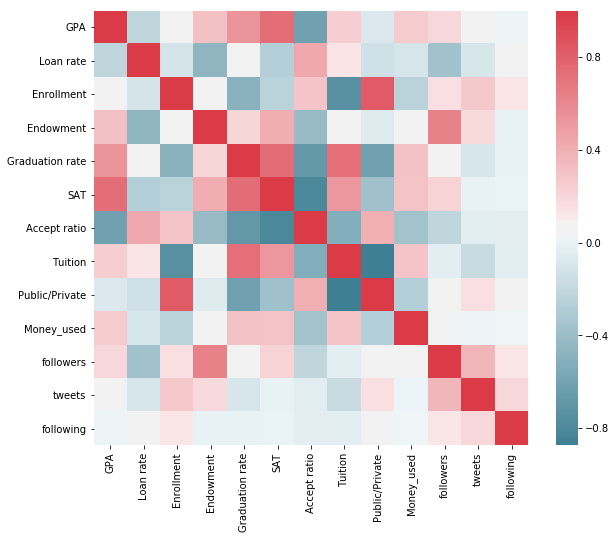

In [102]:
import seaborn as sns
import matplotlib.pyplot as pl
twitter2=twitter.drop(['Unnamed: 0','University_Tag', 'pc1', 'pc2', 'pc3'],axis=1)
f, ax = pl.subplots(figsize=(10, 8))
corr = twitter2.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
pl.show()

## Machine learning

### Extremely randomized trees (ET)

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('endowment_2018.csv')

In [4]:
train = pd.read_csv('train.csv')

In [5]:
test = pd.read_csv('test.csv')

In [84]:
validation = pd.read_csv('validation_data.csv')

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm

In [8]:
X_train = train.drop(['university', 'Money_used','Unnamed: 0'], axis = 1)
y_train = train['Money_used']
X_test = test.drop(['university', 'Money_used','Unnamed: 0'], axis = 1)
y_test = test['Money_used']
X_train_S = preprocessing.scale(X_train)
X_test_S = preprocessing.scale(X_test)

In [9]:
X_train_S = pd.DataFrame(X_train_S, columns = ['gpa_avg', 'loan_ever', 'enrollment_und', 'edm_avg', 'graduation rate',
       'sat_avg', 'accept_ratio', 'tuition', 'pub_pri'])

In [10]:
X_train_S.head()

gpa_avg  loan_ever  enrollment_und   edm_avg  graduation rate   sat_avg  \
0  1.548995  -1.152138        2.034371 -0.123489         0.170429  0.156888   
1  1.074903  -0.157962       -0.866756 -0.281944         1.013088  0.808942   
2  0.885266   0.847273       -0.412165 -0.317659         1.112225  0.543821   
3 -0.347375   0.275552        1.201812 -0.372209        -1.068776 -0.753122   
4  0.126717   0.644377        0.597792 -0.165518         0.368702 -0.373354   

   accept_ratio   tuition   pub_pri  
0     -0.156876 -1.520527  1.357242  
1     -1.261830  0.996485 -0.736788  
2     -0.238725  0.905690 -0.736788  
3      1.439168 -1.237748  1.357242  
4      0.620684 -1.173233  1.357242

In [11]:
X_test_S = pd.DataFrame(data = X_test_S, columns = ['gpa_avg', 'loan_ever', 'enrollment_und', 'edm_avg', 'graduation rate',
       'sat_avg', 'accept_ratio', 'tuition', 'pub_pri'])

In [12]:
X_test_S.head()

gpa_avg  loan_ever  enrollment_und   edm_avg  graduation rate   sat_avg  \
0 -0.445217   0.762578       -0.908998 -0.582475        -0.144978 -0.507652   
1 -0.445217   0.300960        1.169618 -0.123260        -0.894579 -0.917953   
2  0.492082  -0.697561        1.591881  3.210495         0.546962  1.044356   
3  0.023432   0.789380       -0.909092 -0.462112         0.258654  0.607297   
4  0.820136  -1.380404       -0.417123  1.965161         1.238902  1.802521   

   accept_ratio   tuition   pub_pri  
0      0.967530  0.569583 -0.677003  
1      1.622350 -1.487954  1.477098  
2     -0.950157 -1.138500  1.477098  
3      0.265937  0.514798 -0.677003  
4     -1.511431  0.913559 -0.677003

### Initial four machine learning models: Extra trees, Random forest, SVM, and Gradient boosting

In [13]:
models = [ExtraTreesClassifier(n_estimators=10, max_depth=20,min_samples_split=2, random_state=0),
         RandomForestClassifier(n_estimators=20, max_depth = 20, random_state=0),
         svm.SVC(kernel='rbf', gamma=0.7, C=1),
         GradientBoostingClassifier(n_estimators=30, learning_rate=0.75,max_depth=100, random_state=0).fit(X_train, y_train),
         ]

In [14]:
for clf in models:
    clf.fit(X_train_S, y_train)
    y_pred = clf.predict(X_test_S)
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

0.614285714286
[[ 5  4  5]
 [ 2  2  8]
 [ 5  3 36]]
             precision    recall  f1-score   support

          0       0.42      0.36      0.38        14
          1       0.22      0.17      0.19        12
          2       0.73      0.82      0.77        44

avg / total       0.58      0.61      0.60        70

0.714285714286
[[ 6  1  7]
 [ 0  2 10]
 [ 2  0 42]]
             precision    recall  f1-score   support

          0       0.75      0.43      0.55        14
          1       0.67      0.17      0.27        12
          2       0.71      0.95      0.82        44

avg / total       0.71      0.71      0.67        70

0.6
[[ 3  0 11]
 [ 1  0 11]
 [ 5  0 39]]
             precision    recall  f1-score   support

          0       0.33      0.21      0.26        14
          1       0.00      0.00      0.00        12
          2       0.64      0.89      0.74        44

avg / total       0.47      0.60      0.52        70

0.671428571429
[[ 4  0 10]
 [ 1  5  6]
 [ 5  1 38]]

D:\Users\lexie\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Parameter optimization

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import ShuffleSplit
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier

In [16]:
def parameter_best(model, param_grid): 
    estimator = model
    cv = ShuffleSplit(X_train_S.shape[0], n_iter=10, test_size=0.3) 
    classifier = GridSearchCV(estimator = model, cv=cv, param_grid=param_grid)
    classifier.fit(X_train_S, y_train)
    print ('Best Estimator learned through GridSearch:') 
    print (classifier.best_estimator_)
    return cv, classifier.best_estimator_ 

In [17]:
#### best parameter for ExtraTreesClassifier
param_grid={'n_estimators':[10,20,30], 'min_samples_split':[2,3,5,8], 'min_samples_leaf':[1,3,5,9]} 
cv,best_est1= parameter_best(ExtraTreesClassifier(),param_grid)

Best Estimator learned through GridSearch:
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


In [18]:
#### best parameter for RandomForestClassifier
param_grid={'n_estimators':[10,30,50], 'min_samples_split':[2,3,5,8], 'min_samples_leaf':[1,3,5,9],'max_depth':[20,10,5,15]} 
cv,best_est2= parameter_best(RandomForestClassifier(),param_grid)

Best Estimator learned through GridSearch:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [19]:
#### best parameter for svm
param_grid = {'C':[0.1, 1, 10, 100, 1000],'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}
#grid = GridSearchCV(SVC(),param_grid, verbose = 3)
cv,best_est3= parameter_best(svm.SVC(),param_grid)

Best Estimator learned through GridSearch:
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [20]:
#### best parameter for GBoosting selection
param_grid={'n_estimators':[100], 'learning_rate': [0.75,0.5,0.1,0.01], 'max_depth':[3,6,8], 'min_samples_leaf':[3,5,9,17],
            'max_features':[1.0,0.3,0.1] } 
cv,best_est4= parameter_best(GradientBoostingClassifier(),param_grid)

Best Estimator learned through GridSearch:
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=8,
              max_features=0.3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=5, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)


In [27]:
#### DNN
clf = MLPClassifier(hidden_layer_sizes =(200,200)).fit(X_train_S,y_train)
nn_predictions = clf.predict(X_test_S)
accuracy = accuracy_score(y_test, nn_predictions)
print('overall accuaray is', accuracy)
print('confusion_matrix:','\n',confusion_matrix(y_test, nn_predictions))
print('\n')
print(classification_report(y_test, nn_predictions))

overall accuaray is 0.642857142857
confusion_matrix: 
 [[ 8  1  5]
 [ 2  2  8]
 [ 5  4 35]]


             precision    recall  f1-score   support

          0       0.53      0.57      0.55        14
          1       0.29      0.17      0.21        12
          2       0.73      0.80      0.76        44

avg / total       0.61      0.64      0.62        70



D:\Users\lexie\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [21]:
best_ests =[best_est1, best_est2, best_est3, best_est4]

In [22]:
for i in best_ests:
    grid_predictions = i.predict(X_test_S)
    accuracy = accuracy_score(y_test, grid_predictions)
    print('overall accuaray is', accuracy)
    print('confusion_matrix:','\n',confusion_matrix(y_test, grid_predictions))
    print('\n')
    print(classification_report(y_test, grid_predictions))

overall accuaray is 0.671428571429
confusion_matrix: 
 [[ 5  0  9]
 [ 1  0 11]
 [ 2  0 42]]


             precision    recall  f1-score   support

          0       0.62      0.36      0.45        14
          1       0.00      0.00      0.00        12
          2       0.68      0.95      0.79        44

avg / total       0.55      0.67      0.59        70

overall accuaray is 0.657142857143
confusion_matrix: 
 [[ 4  0 10]
 [ 1  0 11]
 [ 2  0 42]]


             precision    recall  f1-score   support

          0       0.57      0.29      0.38        14
          1       0.00      0.00      0.00        12
          2       0.67      0.95      0.79        44

avg / total       0.53      0.66      0.57        70

overall accuaray is 0.6
confusion_matrix: 
 [[ 4  0 10]
 [ 1  0 11]
 [ 6  0 38]]


             precision    recall  f1-score   support

          0       0.36      0.29      0.32        14
          1       0.00      0.00      0.00        12
          2       0.64      0.86 

D:\Users\lexie\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Selective learning

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [29]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train_S,y_train,test_size = 0.30, random_state = 0)

In [30]:
clf = LogisticRegression(random_state=0, solver='saga',multi_class='multinomial',max_iter =500).fit(X_train1, y_train1)

In [31]:
y_pred1 = clf.predict(X_test1)

In [32]:
y_real = np.array(y_test1)

In [33]:
bad_index = []
for i in range(len(y_real)):
    if  y_pred1[i] != y_real[i]:
        #print(i)
        bad_index.append(i)
len(bad_index)

21

In [34]:
X_test1_new = X_test1.reset_index()

In [35]:
X_test1_new['Money_used'] = y_real
X_test1_new.head()

index   gpa_avg  loan_ever  enrollment_und   edm_avg  graduation rate  \
0     66 -0.347375   0.253558        1.262454 -0.190065        -1.614026   
1    131 -0.821468  -0.103586       -0.164537 -0.341760        -1.812299   
2    145 -0.347375   0.725799       -0.776548 -0.267115         0.418270   
3      7 -0.347375   0.174820        0.672284 -0.307061        -1.316617   
4     44  0.932675  -0.090276       -0.871106 -0.130932         1.211361   

    sat_avg  accept_ratio   tuition   pub_pri  Money_used  
0 -0.609814      1.070850 -1.271783  1.357242           0  
1 -0.917927      1.848410 -1.583212  1.357242           1  
2  0.765949     -0.893512  1.014795 -0.736788           1  
3 -0.946589      1.152699 -1.417723  1.357242           1  
4  1.038236     -1.057209  0.890288 -0.736788           2

In [36]:
#bad_guys in Xtest
X_test_bad = X_test1_new.iloc[bad_index]
X_test_bad

index   gpa_avg  loan_ever  enrollment_und   edm_avg  graduation rate  \
1     131 -0.821468  -0.103586       -0.164537 -0.341760        -1.812299   
2     145 -0.347375   0.725799       -0.776548 -0.267115         0.418270   
3       7 -0.347375   0.174820        0.672284 -0.307061        -1.316617   
9     122 -0.347375  -0.433957        0.581544 -0.367986        -2.010572   
14    118  1.074903   0.506050       -0.810376 -0.083665         1.112225   
19    111 -1.769653   0.726147       -0.467923 -0.413904        -0.424389   
22     60  0.600810   0.227241        1.979145  0.045321         0.319134   
23      8  0.600810   0.129482        1.781860  0.066112        -0.325253   
29    123 -0.347375   0.590051       -0.758524 -0.418207        -0.820935   
30    137 -1.295561   0.132959        0.572576 -0.339116        -1.564458   
31     24 -0.821468   0.070404       -0.784184 -0.306832        -0.771367   
32     54  0.126717   0.205024       -0.833017 -0.319533         0.814816   
34     19  1.074903  -0.102683        0.932076 -0.205791        -1.019208   
35    112 -0.347375   0.169542        0.778651 -0.305945        -0.275685   
36    133 -0.821468   0.792149       -0.675597 -0.366156         0.715679   
39    106 -0.347375   0.876107       -0.556178 -0.387402         0.418270   
40     40 -0.821468   0.387752        0.695280 -0.331911        -1.614026   
43     71  1.548995  -2.338099       -0.886200 -0.015183         1.409634   
45    144 -0.347375   0.536651        1.689610 -0.272800        -0.969640   
46    101 -0.347375   0.241897        0.670952 -0.415904        -0.870503   
48    120 -1.295561   0.919934       -0.403286 -0.353104         0.269565   

     sat_avg  accept_ratio   tuition   pub_pri  Money_used  
1  -0.917927      1.848410 -1.583212  1.357242           1  
2   0.765949     -0.893512  1.014795 -0.736788           1  
3  -0.946589      1.152699 -1.417723  1.357242           1  
9  -1.190213      1.357320 -1.454935  1.357242           2  
14  1.145717     -0.525194  0.830835 -0.736788           1  
19 -1.526989      1.111774  0.114004 -0.736788           1  
22  0.393347      0.416063 -1.009629  1.357242           1  
23  0.357520      0.129593 -1.296932  1.357242           1  
29 -1.541320      1.152699 -0.198394 -0.736788           1  
30 -0.788949      0.866229 -1.425909  1.357242           1  
31 -1.548485     -0.075028  0.368026 -0.736788           0  
32  0.536655     -0.647967  1.085342 -0.736788           1  
34 -0.258707      1.111774 -1.165693  1.357242           0  
35 -0.552490      0.375139 -1.338021  1.357242           2  
36  0.142557      0.456987  0.675794 -0.736788           0  
39 -0.287369      1.152699  0.498888 -0.736788           0  
40 -0.645641      1.807486 -1.332421  1.357242           2  
43  1.324853     -1.671072  0.886357 -0.736788           1  
45 -0.774618      1.521016 -1.410722  1.357242           1  
46 -1.211710      0.989002  3.504612  1.357242           1  
48 -1.111394      1.070850  0.655060 -0.736788           0

In [37]:
X_train_S_new = X_train_S.reset_index()

In [38]:
X_train_S_new['Money_used'] = y_train
X_train_S_new.head()

index   gpa_avg  loan_ever  enrollment_und   edm_avg  graduation rate  \
0      0  1.548995  -1.152138        2.034371 -0.123489         0.170429   
1      1  1.074903  -0.157962       -0.866756 -0.281944         1.013088   
2      2  0.885266   0.847273       -0.412165 -0.317659         1.112225   
3      3 -0.347375   0.275552        1.201812 -0.372209        -1.068776   
4      4  0.126717   0.644377        0.597792 -0.165518         0.368702   

    sat_avg  accept_ratio   tuition   pub_pri  Money_used  
0  0.156888     -0.156876 -1.520527  1.357242           2  
1  0.808942     -1.261830  0.996485 -0.736788           2  
2  0.543821     -0.238725  0.905690 -0.736788           2  
3 -0.753122      1.439168 -1.237748  1.357242           2  
4 -0.373354      0.620684 -1.173233  1.357242           1

In [39]:
merged = pd.merge(X_train_S_new, X_test1_new,how = 'left',on = ['gpa_avg', 'loan_ever', 'enrollment_und', 'edm_avg',
       'graduation rate', 'sat_avg', 'accept_ratio', 'tuition', 'pub_pri','Money_used'])
merged.head()

index_x   gpa_avg  loan_ever  enrollment_und   edm_avg  graduation rate  \
0        0  1.548995  -1.152138        2.034371 -0.123489         0.170429   
1        1  1.074903  -0.157962       -0.866756 -0.281944         1.013088   
2        2  0.885266   0.847273       -0.412165 -0.317659         1.112225   
3        3 -0.347375   0.275552        1.201812 -0.372209        -1.068776   
4        4  0.126717   0.644377        0.597792 -0.165518         0.368702   

    sat_avg  accept_ratio   tuition   pub_pri  Money_used  index_y  
0  0.156888     -0.156876 -1.520527  1.357242           2      NaN  
1  0.808942     -1.261830  0.996485 -0.736788           2      NaN  
2  0.543821     -0.238725  0.905690 -0.736788           2      NaN  
3 -0.753122      1.439168 -1.237748  1.357242           2      NaN  
4 -0.373354      0.620684 -1.173233  1.357242           1      NaN

In [40]:
selected = merged[pd.isnull(merged['index_y'])]

In [41]:
clean_data = selected.drop(['index_y'],axis = 1)

In [42]:
#clean training data with label 
clean_data.head()

index_x   gpa_avg  loan_ever  enrollment_und   edm_avg  graduation rate  \
0        0  1.548995  -1.152138        2.034371 -0.123489         0.170429   
1        1  1.074903  -0.157962       -0.866756 -0.281944         1.013088   
2        2  0.885266   0.847273       -0.412165 -0.317659         1.112225   
3        3 -0.347375   0.275552        1.201812 -0.372209        -1.068776   
4        4  0.126717   0.644377        0.597792 -0.165518         0.368702   

    sat_avg  accept_ratio   tuition   pub_pri  Money_used  
0  0.156888     -0.156876 -1.520527  1.357242           2  
1  0.808942     -1.261830  0.996485 -0.736788           2  
2  0.543821     -0.238725  0.905690 -0.736788           2  
3 -0.753122      1.439168 -1.237748  1.357242           2  
4 -0.373354      0.620684 -1.173233  1.357242           1

In [43]:
y_pred1_prob = clf.predict_proba(X_test1) 
traintest_thres=[]
for i in range(y_pred1_prob.shape[0]):
    traintest_thres.append(1-y_pred1_prob[i][y_test1.tolist()[i]])

In [44]:
thres = sorted(traintest_thres)[-10]
train_fil = []
for i in range(X_train_S.shape[0]):
    if 1-clf.predict_proba(X_train_S.iloc[i].reshape(1, -1))[0][y_train[i]] < thres:
        train_fil.append(i)

D:\Users\lexie\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


In [45]:
test_fil = []
for i in range(X_test_S.shape[0]):
    if 1-clf.predict_proba(X_test_S.iloc[i].reshape(1, -1))[0][y_test[i]] < thres:
        test_fil.append(i)

D:\Users\lexie\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
#clean data and remodeling 
train_xn = X_train_S.iloc[train_fil]
test_xn = X_test_S.iloc[test_fil]
train_yn = y_train.iloc[train_fil]
test_yn = y_test.iloc[test_fil]

In [47]:
models = [ExtraTreesClassifier(n_estimators=10, max_depth=20,min_samples_split=2, random_state=0),
         RandomForestClassifier(n_estimators=20, max_depth = 20, random_state=0),
         svm.SVC(kernel='rbf', gamma=0.001, C=100),
         GradientBoostingClassifier(n_estimators=30, learning_rate=0.75,max_depth=100, random_state=0).fit(X_train, y_train)]
for clf in models:
    clf.fit(train_xn, train_yn)
    y_pred_good = clf.predict(test_xn)
    accuracy = accuracy_score(test_yn, y_pred_good)
    print(accuracy)
    print(confusion_matrix(test_yn, y_pred_good))
    print(classification_report(test_yn, y_pred_good))

0.75
[[ 7  0  6]
 [ 0  0  3]
 [ 6  0 38]]
             precision    recall  f1-score   support

          0       0.54      0.54      0.54        13
          1       0.00      0.00      0.00         3
          2       0.81      0.86      0.84        44

avg / total       0.71      0.75      0.73        60

0.8
[[ 7  2  4]
 [ 1  1  1]
 [ 4  0 40]]
             precision    recall  f1-score   support

          0       0.58      0.54      0.56        13
          1       0.33      0.33      0.33         3
          2       0.89      0.91      0.90        44

avg / total       0.79      0.80      0.80        60

0.683333333333
[[ 4  0  9]
 [ 0  0  3]
 [ 7  0 37]]
             precision    recall  f1-score   support

          0       0.36      0.31      0.33        13
          1       0.00      0.00      0.00         3
          2       0.76      0.84      0.80        44

avg / total       0.63      0.68      0.66        60

0.75
[[ 6  1  6]
 [ 0  1  2]
 [ 4  2 38]]
             precis

D:\Users\lexie\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Users\lexie\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Learning validation

### Use Extremely randomized trees (ET) to classify the validation dataset,generate a csv file validation_ans.csv where the last column should have the predicted label for each institute

In [85]:
validation.head()

university  GPA  loan rate  enrollment  \
0                              The Citadel  3.6   0.904821        2773   
1                San Jose State University  3.4   0.599711       26432   
2  California State University--Long Beach  3.5   0.580011       32236   
3             University of Texas--El Paso  3.2   0.536252       20521   
4                      University of Akron  3.3   0.890165       17416   

   Endowment  graduation rate   SAT  accept_ratio  tuition  Public/private  
0   249677.5             0.60  1165          0.82    12056               1  
1   122836.0             0.11  1055          0.53     9397               1  
2    56816.5             0.14  1056          0.32     6524               1  
3   218900.0             0.15   933          1.00     7651               1  
4   193450.0             0.16  1049          0.96    13332               1

In [86]:
to_scale = validation.drop(['university'],axis = 1)

In [87]:
data_scaled = preprocessing.scale(to_scale)

In [88]:
data_scaled = pd.DataFrame(data_scaled, columns = ['GPA', 'loan rate', 'enrollment', 'Endowment',
       'graduation rate', 'SAT', 'accept_ratio', 'tuition','Public/Private'])

In [89]:
data_scaled.columns

Index(['GPA', 'loan rate', 'enrollment', 'Endowment', 'graduation rate', 'SAT',
       'accept_ratio', 'tuition', 'Public/Private'],
      dtype='object')

In [90]:
et_predict = best_est1.predict(data_scaled)

In [98]:
len(data_scaled)

100

In [92]:
validation.columns = ['University', 'GPA', 'Loan rate', 'Enrollment', 'Endowment',
       'Graduation rate', 'SAT', 'Accept ratio', 'Tuition', 'Public/Private']

In [102]:
validation['money_used_predicted'] = et_predict
validation

University  GPA  Loan rate  \
0                                         The Citadel  3.6   0.904821   
1                           San Jose State University  3.4   0.599711   
2             California State University--Long Beach  3.5   0.580011   
3                        University of Texas--El Paso  3.2   0.536252   
4                                 University of Akron  3.3   0.890165   
5                               University of Memphis  3.4   0.840879   
6                            Wichita State University  3.4   0.853023   
7                                University of Toledo  3.4   0.874478   
8                             John Carroll University  3.6   0.950806   
9               Franciscan University of Steubenville  3.6   0.946492   
10                                 Liberty University  3.5   0.871765   
11                                University of Idaho  3.4   0.858428   
12  Indiana University-Purdue University--Indianap...  3.5   0.803807   
13                                University of Maine  3.2   0.919894   
14                         University of North Dakota  3.4   0.925485   
15                                 Samford University  3.6   0.904821   
16                           Texas Woman's University  3.1   0.830295   
17                      Loyola University New Orleans  3.5   0.927644   
18                              Valparaiso University  3.7   0.949598   
19                   St. Mary's College of California  3.6   0.944023   
20                              Wilmington University  3.1   0.859920   
21                                  Regent University  3.5   0.838174   
22                   University of the Incarnate Word  3.5   0.839304   
23                   University of Mary Hardin-Baylor  3.5   0.908829   
24                          Hawaii Pacific University  3.4   0.791833   
25                                 Trinity University  3.6   0.891144   
26                             Santa Clara University  3.7   0.911357   
27                        Loyola Marymount University  3.7   0.912169   
28                                    Rollins College  3.3   0.883991   
29                                 Chapman University  3.7   0.928232   
..                                                ...  ...        ...   
70               St. Mary's University of San Antonio  3.5   0.930108   
71                                 Pacific University  3.7   0.946225   
72                           University of St. Thomas  3.6   0.793537   
73                          Hardin-Simmons University  3.7   0.888457   
74                     Queens University of Charlotte  3.6   0.937754   
75                                 Hampton University  3.3   0.938800   
76                                 Harding University  3.6   0.926861   
77                     Xavier University of Louisiana  3.4   0.841943   
78                                Campbell University  3.9   0.758071   
79                                 Hamline University  3.5   0.944394   
80                       Nebraska Wesleyan University  3.6   0.938053   
81                         Baldwin Wallace University  3.5   0.954257   
82                               Otterbein University  3.6   0.939771   
83                                    Pace University  3.3   0.921973   
84                                  Hillsdale College  3.8   0.906184   
85                       Illinois Wesleyan University  3.8   0.974194   
86                                       Knox College  3.7   0.943463   
87                                 Muhlenberg College  3.3   0.946950   
88                                    Wofford College  3.6   0.897959   
89                                     Beloit College  3.3   0.963203   
90                                     Hendrix Colleg  3.9   0.926882   
91                                  Kalamazoo College  3.7   0.927059   
92                          Alaska Pacific University  3.2   0.805755   
93                      Univ

In [104]:
validation.to_csv('validation_ans.csv')

### Use selective learning to this dataset and create validation_ans_sure.csv file to include all predicted.

In [134]:
#data partition
val_x = data_scaled
val_y = validation['money_used_predicted']

x_train_val,x_test_val,y_train_val,y_test_val = train_test_split(val_x,val_y,test_size = 0.3, random_state = 0)

In [135]:
#partition training data 
x_train_tn,x_train_ts,y_train_tn,y_train_ts = train_test_split(x_train_val,y_train_val,test_size = 0.3,random_state = 0)

In [136]:
train_etc= ExtraTreesClassifier()
train_etc.fit(x_train_tn, y_train_tn)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [137]:
train_predict = train_etc.predict(x_train_ts)

In [138]:
#evaluation
print('training set overall acc:',train_etc.score(x_train_tn,y_train_tn))
print('test set overall acc:',train_etc.score(x_train_ts,y_train_ts))
print(classification_report(y_train_ts,train_predict ))

training set overall acc: 1.0
test set overall acc: 0.952380952381
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         3
          1       0.00      0.00      0.00         1
          2       0.94      1.00      0.97        17

avg / total       0.91      0.95      0.93        21



D:\Users\lexie\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [139]:
train_real_y = np.array(y_train_ts)
train_real_y

array([0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2], dtype=int64)

In [140]:
for i in range(len(train_predict)):
    if train_predict[i] != train_real_y[i]:
        print(i)

17


In [141]:
x_train_bad = x_train_ts.iloc[[3,4,17,18]]
x_train_bad

GPA  loan rate  enrollment  Endowment  graduation rate       SAT  \
0   0.138730   0.221964   -0.473533   0.252564         0.605454  0.440447   
10 -0.394848  -0.133711    4.476247   4.412423        -0.967154 -0.634918   
21 -0.394848  -0.495152   -0.358053  -0.446406        -1.416470 -0.849991   
97 -0.394848  -4.296400    0.560983  -0.485543        -1.809622 -2.049873   

    accept_ratio   tuition  Public/Private  
0       0.731165 -1.350071        1.882938  
10     -2.970938 -0.441377       -0.531085  
21      0.799723 -0.949883       -0.531085  
97     -0.777099 -1.716130        1.882938

In [142]:
x_train_ts_clean = x_train_ts.drop([0,10,21,97])
x_train_ts_clean

GPA  loan rate  enrollment  Endowment  graduation rate       SAT  \
11 -0.928426  -0.277225    0.288101   0.192991        -1.079483 -0.861311   
35 -0.394848  -0.176252   -0.464254  -0.548161         0.380796 -0.408526   
72  0.138730  -0.975451   -0.580741  -0.563060        -0.910989 -0.261370   
37 -0.394848   0.278809    1.401765  -0.572805         0.886277  0.089538   
56  1.205887   0.729746   -0.303946  -0.093231         0.436960  0.938511   
70 -0.394848   0.494050   -0.526634  -0.108455        -0.461673 -0.182133   
79 -0.394848   0.647770   -0.539378  -0.538778         0.099973  0.010301   
44  0.138730   0.135210   -0.328540  -0.701511         0.043808 -0.385886   
58  0.672308   0.848742   -0.273427  -0.217267         0.717783 -0.170813   
23 -0.394848   0.265089   -0.417079  -0.601974        -1.023318 -1.200900   
31  0.138730   0.369479   -0.358947  -0.221859         1.447923  0.780036   
49  0.672308   0.412193   -0.551787   3.471692         0.549289  0.598922   
57  0.138730   0.420269   -0.693203  -0.103685         0.717783  0.644200   
65 -0.394848   0.449337   -0.421662  -0.287430         0.886277  0.044260   
47  0.672308   0.345748   -0.516796  -0.651482         0.212302  0.519684   
51  0.672308   0.817597   -0.283488   0.388178         0.268467  0.417808   
96 -1.462004   0.757495   -0.567885  -0.124017        -0.349344 -0.691516   

    accept_ratio   tuition  Public/Private  
11      0.319821 -1.688976        1.882938  
35     -0.091524  0.453813       -0.531085  
72      0.388378  0.178564       -0.531085  
37      0.045591 -1.441029        1.882938  
56      0.114148  0.736111       -0.531085  
70      0.456935 -0.070718       -0.531085  
79     -0.091524  0.747759       -0.531085  
44     -0.982771  0.311366       -0.531085  
58     -0.160082  0.517618       -0.531085  
23      0.525493 -0.189424       -0.531085  
31     -0.708541  1.021821       -0.531085  
49     -0.639984  0.365229       -0.531085  
57      1.108231  1.161374       -0.531085  
65      1.073953  1.321998       -0.531085  
47     -1.736903  0.335404       -0.531085  
51     -0.091524  0.198596       -0.531085  
96     -0.502869 -0.274744       -0.531085

In [143]:
final_x_train_clean = pd.concat([x_train_tn, x_train_ts_clean])

In [144]:
y_train1 = y_train_tn.to_frame()

In [145]:
y_test_clean = y_train_ts.to_frame().drop([10,37,21,97])

In [146]:
final_y_train_clean = pd.concat([y_train1,y_test_clean])

In [147]:
#remodeling
new_etc = ExtraTreesClassifier()
new_etc.fit(final_x_train_clean, final_y_train_clean)

D:\Users\lexie\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [148]:
new_etc_predict = new_etc.predict(x_test_val)
#evaluation
print('training set overall acc:',new_etc.score(final_x_train_clean,final_y_train_clean))
print('test set overall acc:', new_etc.score(x_test_val,y_test_val))
print(classification_report(y_test_val,pd.Series(new_etc_predict)))

training set overall acc: 1.0
test set overall acc: 0.933333333333
             precision    recall  f1-score   support

          0       0.80      0.80      0.80         5
          2       0.96      0.96      0.96        25

avg / total       0.93      0.93      0.93        30



In [149]:
x_test_val['y_real'] = y_test_val
x_test_val['y_predict'] = new_etc_predict

D:\Users\lexie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Users\lexie\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [150]:
x_test_val

GPA  loan rate  enrollment  Endowment  graduation rate       SAT  \
26  0.672308   0.292298   -0.175609   3.251656         1.841075  2.115753   
86  0.672308   0.637753   -0.631829  -0.363729         1.110935  0.553643   
2  -0.394848  -3.272985    2.820172  -0.690930        -1.978116 -0.793393   
55  1.205887   0.529257   -0.206687  -0.071153         1.447923  0.893232   
75 -1.462004   0.587578   -0.354699   0.295850        -0.461673 -1.200900   
93  1.739465  -1.843201    5.451737  -0.260017        -0.517837  0.553643   
16 -2.529160  -0.579929    0.379993  -0.718074        -1.584964 -2.095151   
73  0.672308   0.045885   -0.591137  -0.160708        -0.686331 -1.087704   
54  0.672308   0.689384   -0.418308  -0.018193         1.167100  1.108305   
95  0.672308   0.540697   -0.138495  -0.637687         0.099973 -0.917909   
53  0.138730   0.606693   -0.249168  -0.014923         0.830112  0.746077   
92 -1.995582  -0.843979   -0.750664  -0.536420        -0.742496 -1.393334   
78  1.739465  -1.357060   -0.273762  -0.304535        -0.517837 -1.348055   
13 -1.995582   0.384154    0.258699   0.354430        -0.742496 -0.634918   
7  -0.928426  -0.104528    1.032742   1.025806        -1.528800 -0.646238   
30  1.739465   0.343381   -0.438207   0.038890         0.380796  1.232821   
22 -0.394848  -0.483000   -0.065495  -0.361773        -0.910989 -2.615854   
24 -0.928426  -0.993779   -0.399416  -0.695903        -1.528800 -1.483891   
33  0.138730   0.758847   -0.479905  -0.477737         0.380796 -0.012338   
8   0.138730   0.716770   -0.445026  -0.007927         0.942441  0.010301   
43  0.672308   0.115906   -0.586330  -0.566262        -0.124685 -0.001019   
62  0.138730   0.596893   -0.428481  -0.602953        -0.405508 -1.065064   
3  -1.995582  -3.743839    1.510538   0.101998        -1.921952 -2.185708   
71  0.672308   0.667478   -0.567773  -0.668830        -0.068521 -0.408526   
45 -0.928426  -3.273726    1.869611  -0.538722        -1.753458 -0.680197   
48  0.138730   0.237011   -0.201657  -0.153966         0.436960 -0.363247   
6  -0.928426  -0.335381    0.538178   0.168051        -1.528800 -0.419845   
99  0.138730   0.081764   -0.449722  -0.632305        -0.068521  0.032940   
82  0.138730   0.598024   -0.505729  -0.549140         0.156137 -0.068937   
76  0.138730   0.459115   -0.289525  -0.389200        -0.349344  0.100858   

    accept_ratio   tuition  Public/Private  y_real  y_predict  
26     -1.599788  1.454504       -0.531085       2          2  
86     -0.434312  1.090967       -0.531085       2          2  
2      -2.696708 -1.760496        1.882938       2          2  
55     -0.297197  0.821801       -0.531085       2          2  
75     -0.434312 -0.356948       -0.531085       2          2  
93     -1.462673 -1.772070        1.882938       2          2  
16      1.005395 -1.549645        1.882938       2          0  
73      1.142510 -0.208714       -0.531085       2          2  
54     -0.160082  0.653536       -0.531085       2          2  
95      0.868280  0.435265       -0.531085       2          2  
53     -0.708541  0.937169       -0.531085       2          2  
92     -1.119886 -0.732503       -0.531085       2          2  
78      0.662608  0.069503       -0.531085       2          2  
13      1.279625 -1.435687        1.882938       0          0  
7       1.553855 -1.558993        1.882938       0          0  
30     -0.365754  1.055504       -0.531085       2          2  
22      1.416740 -0.019526       -0.531085       2          2  
24      0.251263 -0.426836       -0.531085       2          2  
33     -0.845656  0.556123       -0.531085       2          2  
8       0.799723  0.722385       -0.531085       0          2  
43      0.045591  0.035078       -0.531085       2          2  
62     -0.160082  0.600638       -0.531085       2          2  
3       1.965200 -1.676883        1.882938       0          0  
71      0.525493  0.989770       -0.531085       2          2  
45     -0.845656 -1.7

In [151]:
x_test_val.to_csv('validation_ans_sure.csv')